### Importing data and treating outliers

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the data
df = pd.read_csv('data/final_data.csv')

# Define the variables to predict
variables = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']

In [17]:
df.tail()

,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),...,soil_moisture_100_to_255cm (m³/m³),is_holiday,2_wheeler_motor,4_wheeler_motor,bikes_scooters,valeur_NO2_clean,valeur_CO_clean,valeur_O3_clean,valeur_PM10_clean,valeur_PM25_clean
id,,,,,,,,,,,,,,,,,,,,,
2024-09-03 18:00:00,22.476504,0.222,55.1,12.0,5.3,21.1,57,12.3,21.1,0.0,...,0.316,False,117.0,36.0,1119.0,22.476504,0.222,55.1,12.0,5.3
2024-09-03 19:00:00,25.452015,0.245,48.2,13.4,7.0,19.7,64,12.7,19.8,0.0,...,0.316,False,152.0,60.0,484.0,25.452015,0.245,48.2,13.4,7.0
2024-09-03 20:00:00,24.303319,0.234,44.5,12.4,7.1,18.7,67,12.6,18.4,0.0,...,0.316,False,111.0,32.0,760.0,24.303319,0.234,44.5,12.4,7.1
2024-09-03 21:00:00,28.484285,0.225,25.9,10.6,5.4,16.9,76,12.7,16.7,0.0,...,0.316,False,87.0,3.0,647.0,28.484285,0.225,25.9,10.6,5.4
2024-09-03 22:00:00,20.914497,0.184,37.7,8.5,4.6,15.8,79,12.1,15.6,0.0,...,0.316,False,100.0,35.0,239.0,20.914497,0.184,37.7,8.5,4.6


In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'valeur_NO2', 'valeur_CO', 'valeur_O3',
       'valeur_PM10', 'valeur_PM25', 'temperature_2m (°C)',
       'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_direction_10m (°)', 'wind_direction_100m (°)',
       'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (°C)',
       'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'date', 'is_holiday',
       '2_wheeler_motor', '4_wheeler_motor', 'bikes_scooters'],
      dtype='object')

In [7]:
df = df.drop(df.columns[0], axis=1)

In [8]:
df = df.drop('date', axis=1)

In [9]:
df.head()

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),...,soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),is_holiday,2_wheeler_motor,4_wheeler_motor,bikes_scooters
0,2020-01-01 00,42.9,0.718000,15.7,73.1,64.4,-0.2,99,-0.3,-2.7,...,8.2,12.0,0.380,0.385,0.383,0.288,True,NaN,NaN,NaN
1,2020-01-01 01,33.6,0.587000,10.1,74.8,66.0,2.6,98,2.3,0.3,...,8.2,12.0,0.382,0.386,0.383,0.288,True,NaN,NaN,NaN
2,2020-01-01 02,29.3,0.446091,5.1,51.0,44.9,2.1,100,2.0,-0.3,...,8.2,12.0,0.382,0.386,0.383,0.288,True,NaN,NaN,NaN
3,2020-01-01 03,30.5,0.246000,7.2,27.7,25.1,1.9,100,1.9,-0.7,...,8.2,12.0,0.382,0.386,0.383,0.288,True,NaN,NaN,NaN
4,2020-01-01 04,29.3,0.204000,8.3,15.3,13.6,2.2,98,1.9,-0.7,...,8.2,12.0,0.382,0.386,0.383,0.288,True,NaN,NaN,NaN


In [10]:
# Convert 'id' column to datetime
df['id'] = pd.to_datetime(df['id'])

# Set 'id' as the index
df.set_index('id', inplace=True)

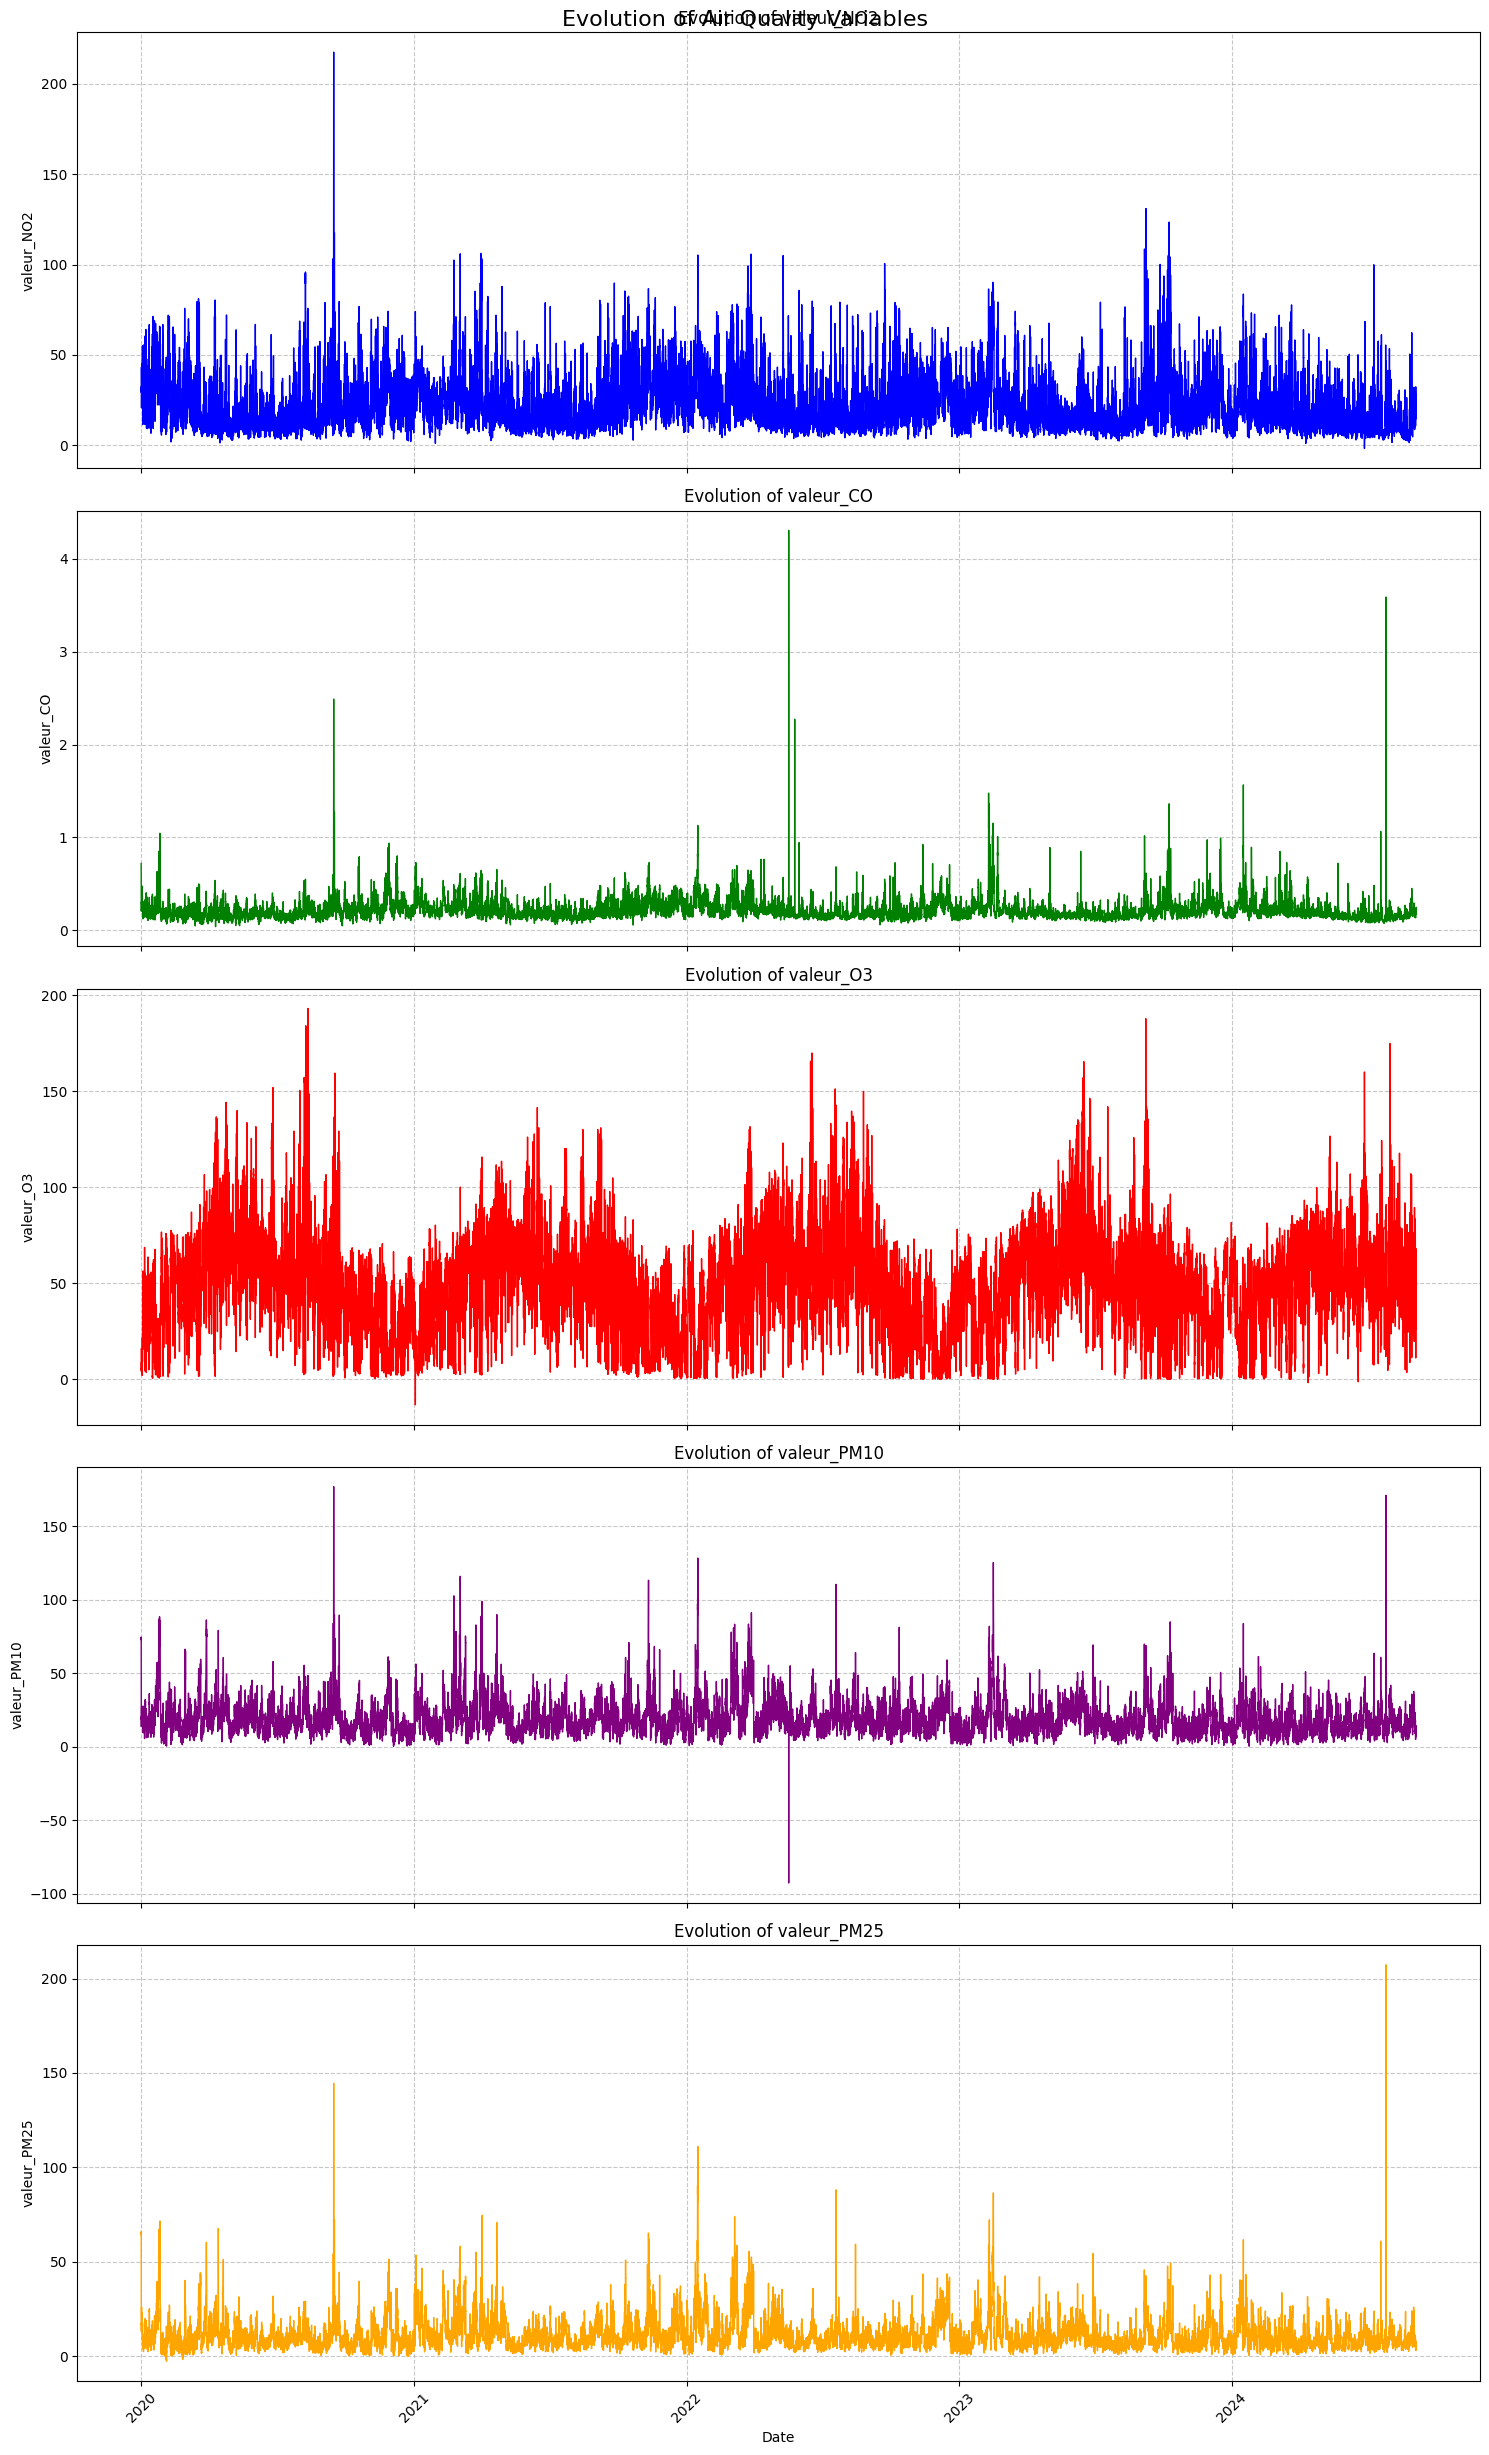

In [11]:
# Create the plot
fig, axes = plt.subplots(5, 1, figsize=(15, 25), sharex=True)
fig.suptitle('Evolution of Air Quality Variables', fontsize=16)

variables = ['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25']
colors = ['blue', 'green', 'red', 'purple', 'orange']

for i, (var, color) in enumerate(zip(variables, colors)):
    axes[i].plot(df.index, df[var], color=color, linewidth=1)
    axes[i].set_ylabel(var)
    axes[i].grid(True, linestyle='--', alpha=0.7)
    
    # Add a title to each subplot
    axes[i].set_title(f'Evolution of {var}', fontsize=12)

# Adjust x-axis labels
plt.xticks(rotation=45)
plt.xlabel('Date')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#### Seasonality inspection

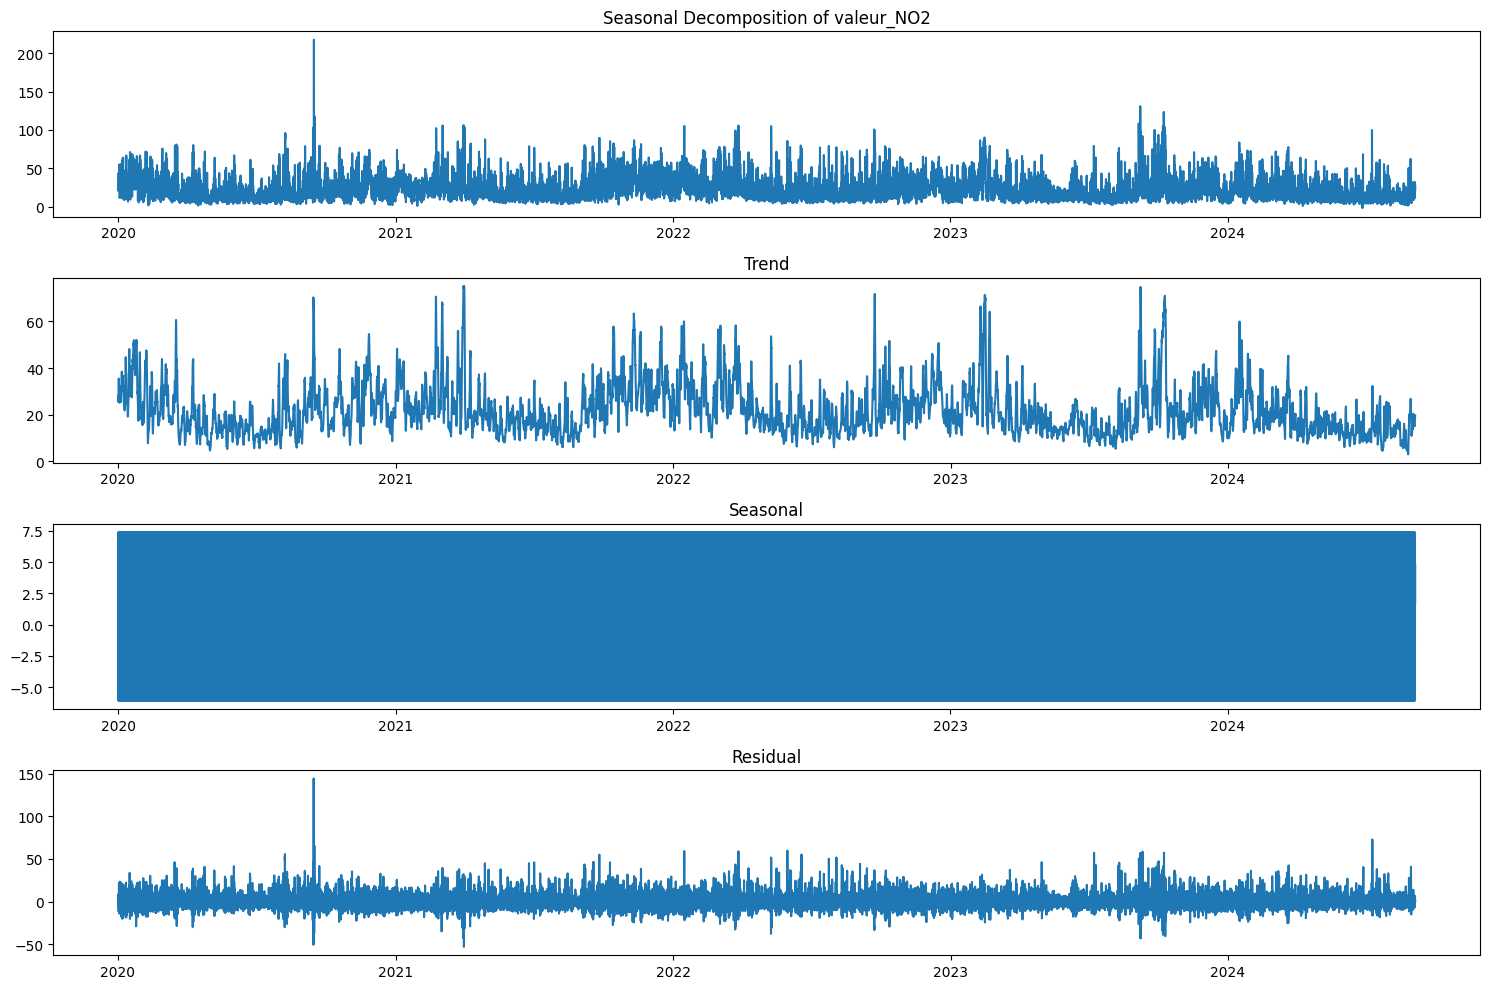

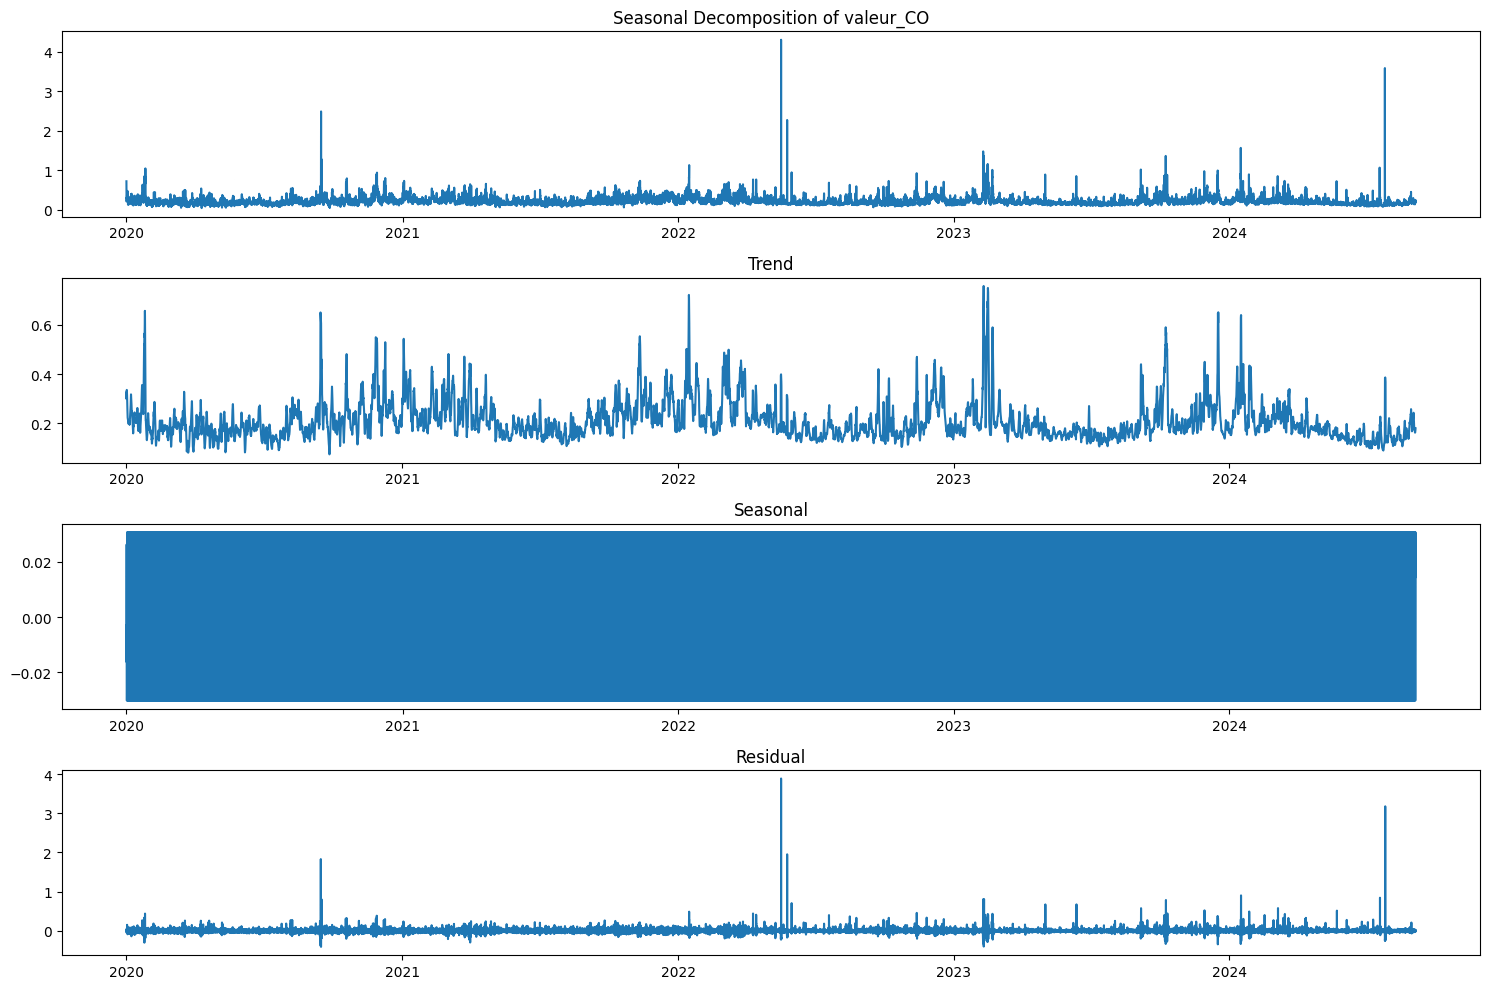

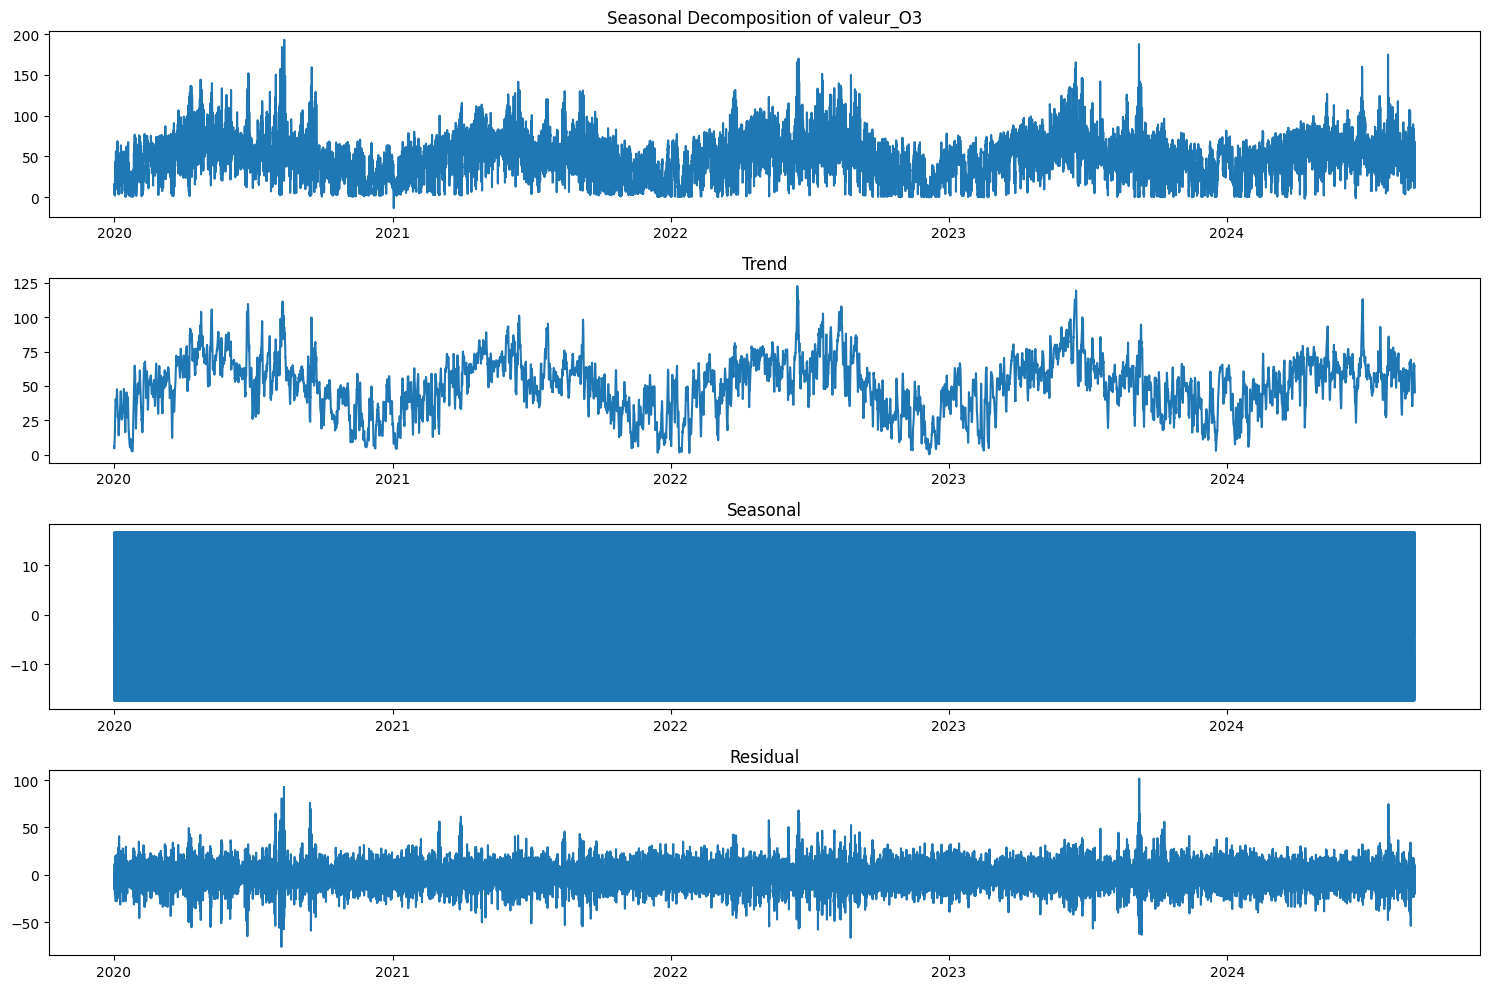

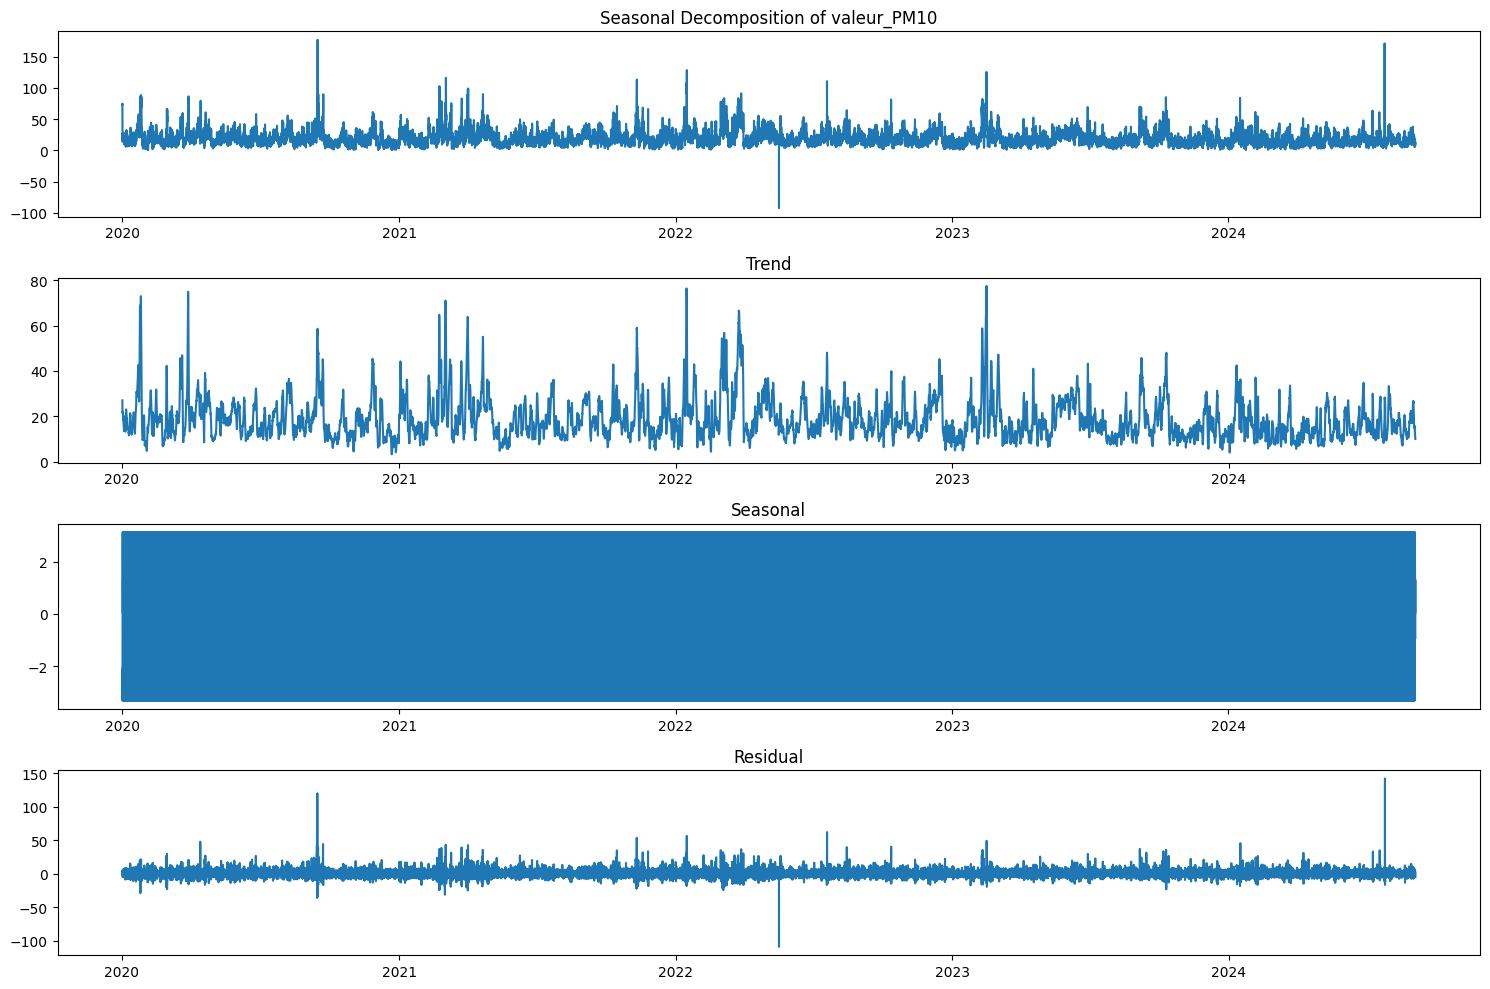

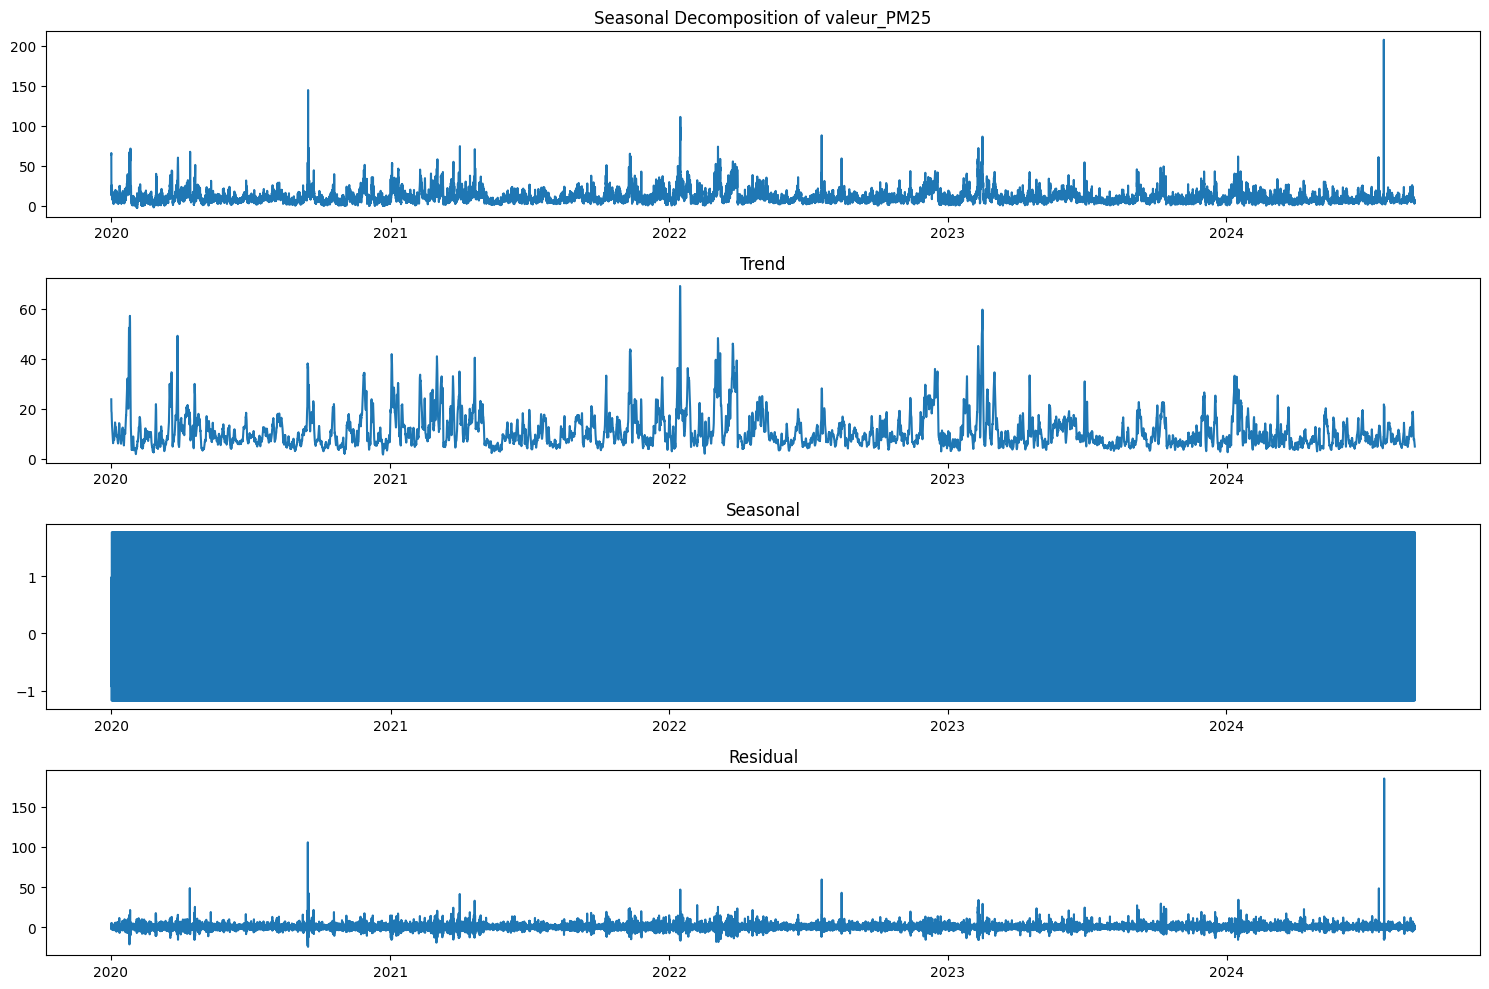

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

for column in variables:
    result = seasonal_decompose(df[column].dropna(), model='additive', period=24)  # Assuming hourly data with daily seasonality
    
    plt.figure(figsize=(15, 10))
    plt.subplot(411)
    plt.plot(result.observed)
    plt.title(f'Seasonal Decomposition of {column}')
    plt.subplot(412)
    plt.plot(result.trend)
    plt.title('Trend')
    plt.subplot(413)
    plt.plot(result.seasonal)
    plt.title('Seasonal')
    plt.subplot(414)
    plt.plot(result.resid)
    plt.title('Residual')
    plt.tight_layout()
    plt.show()

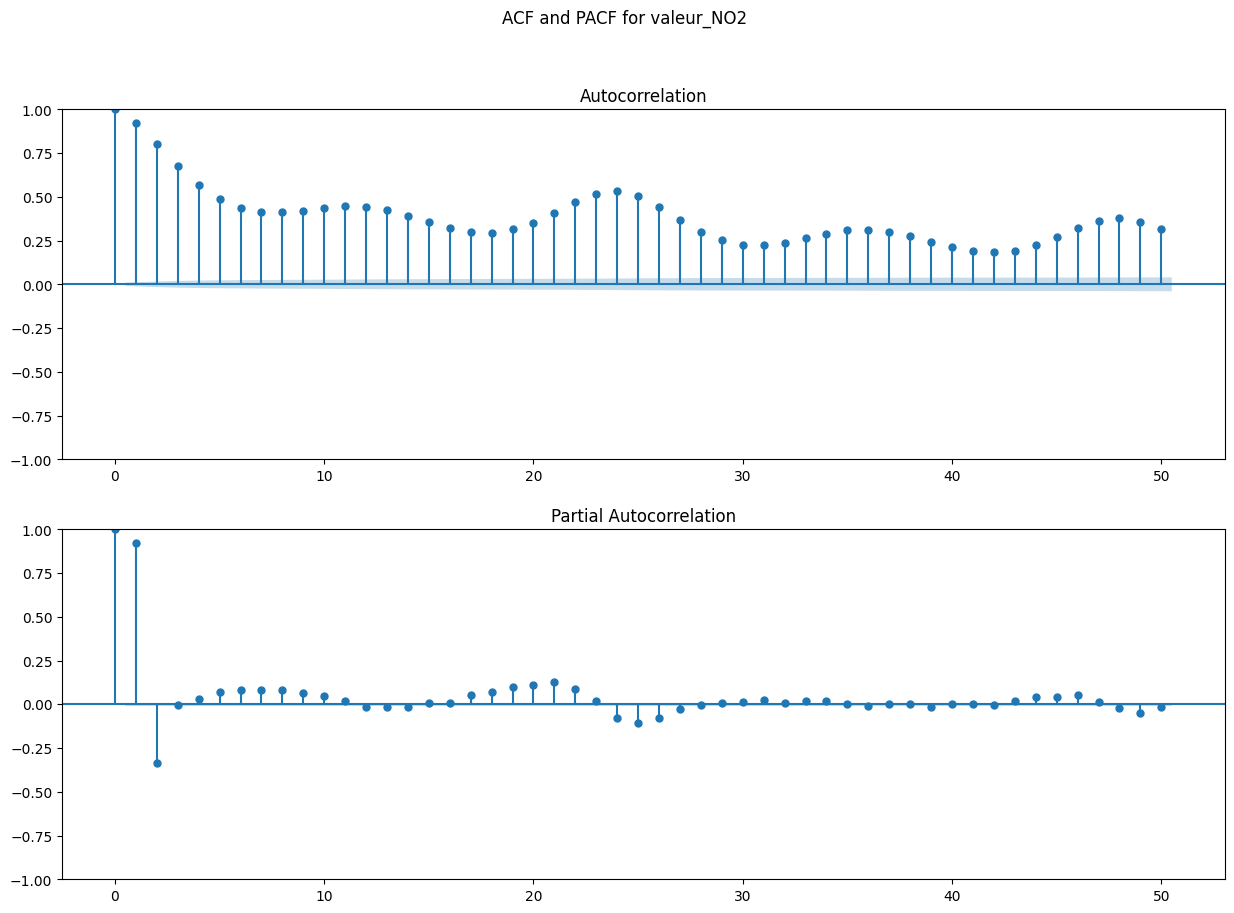

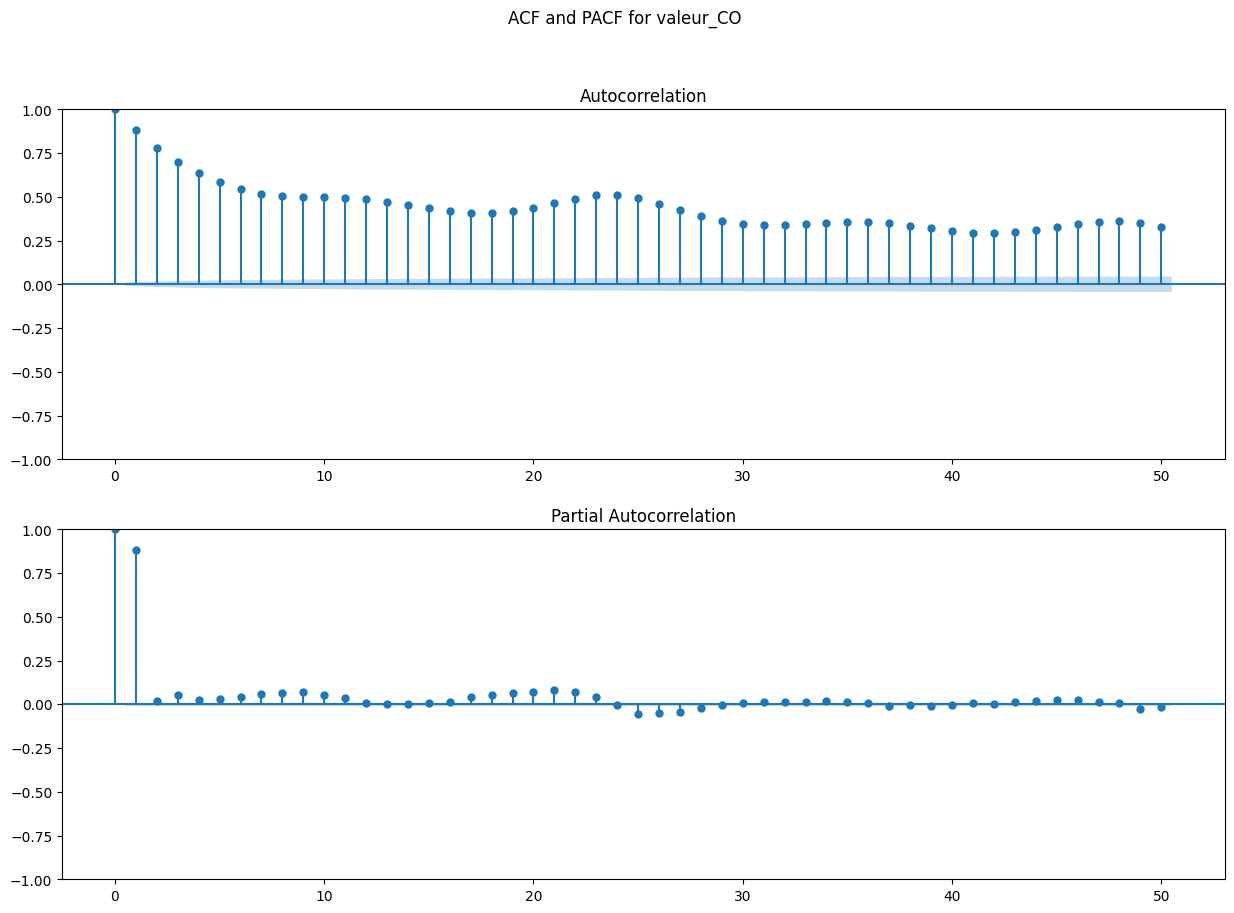

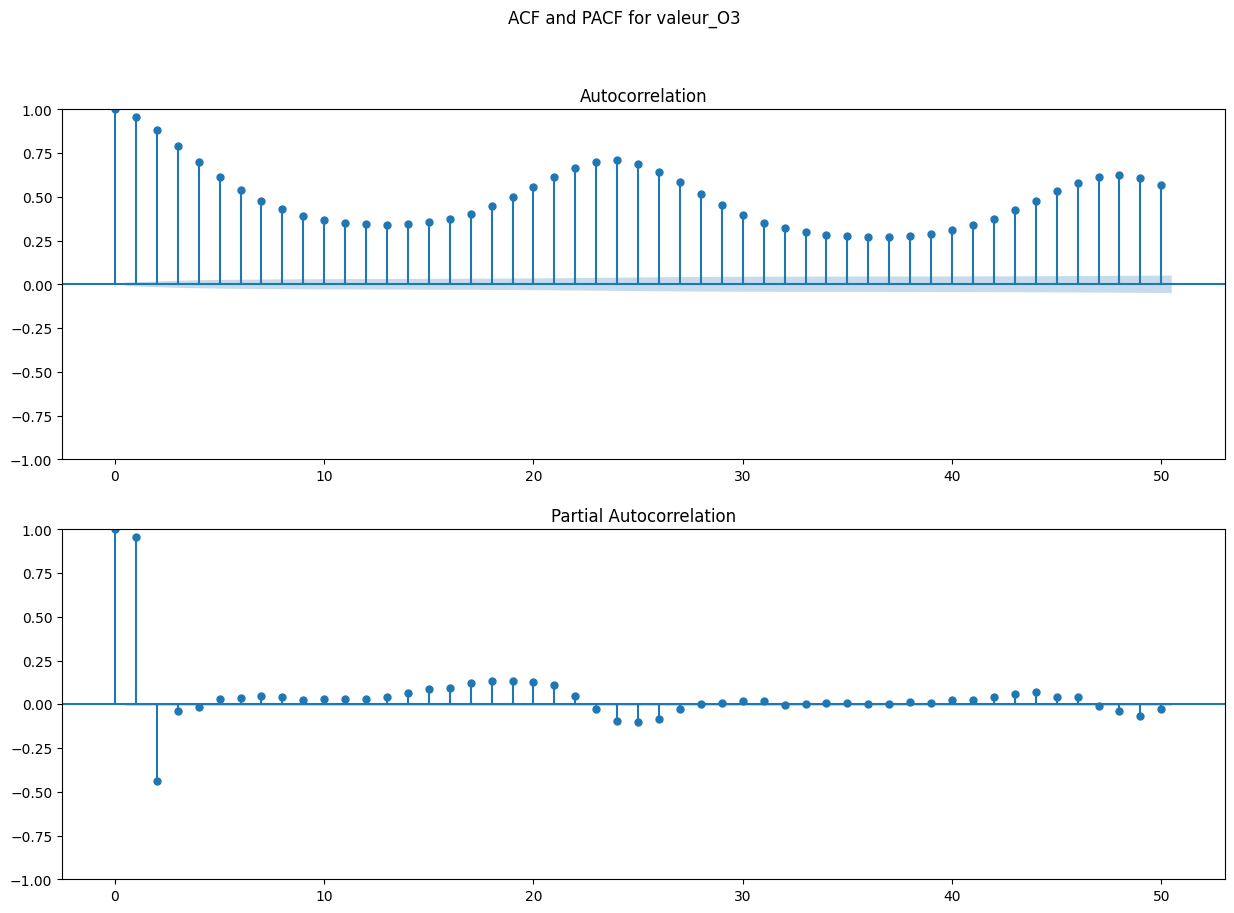

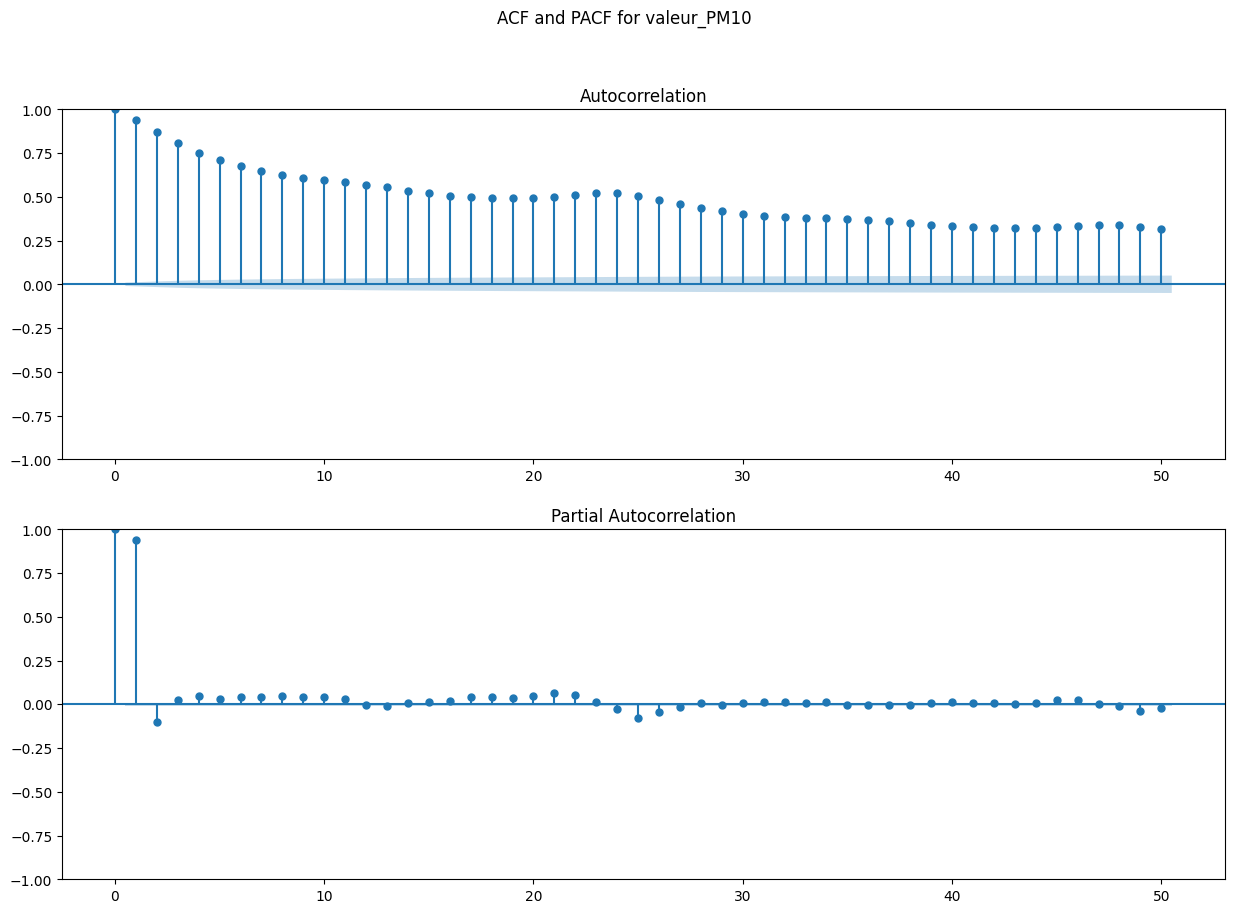

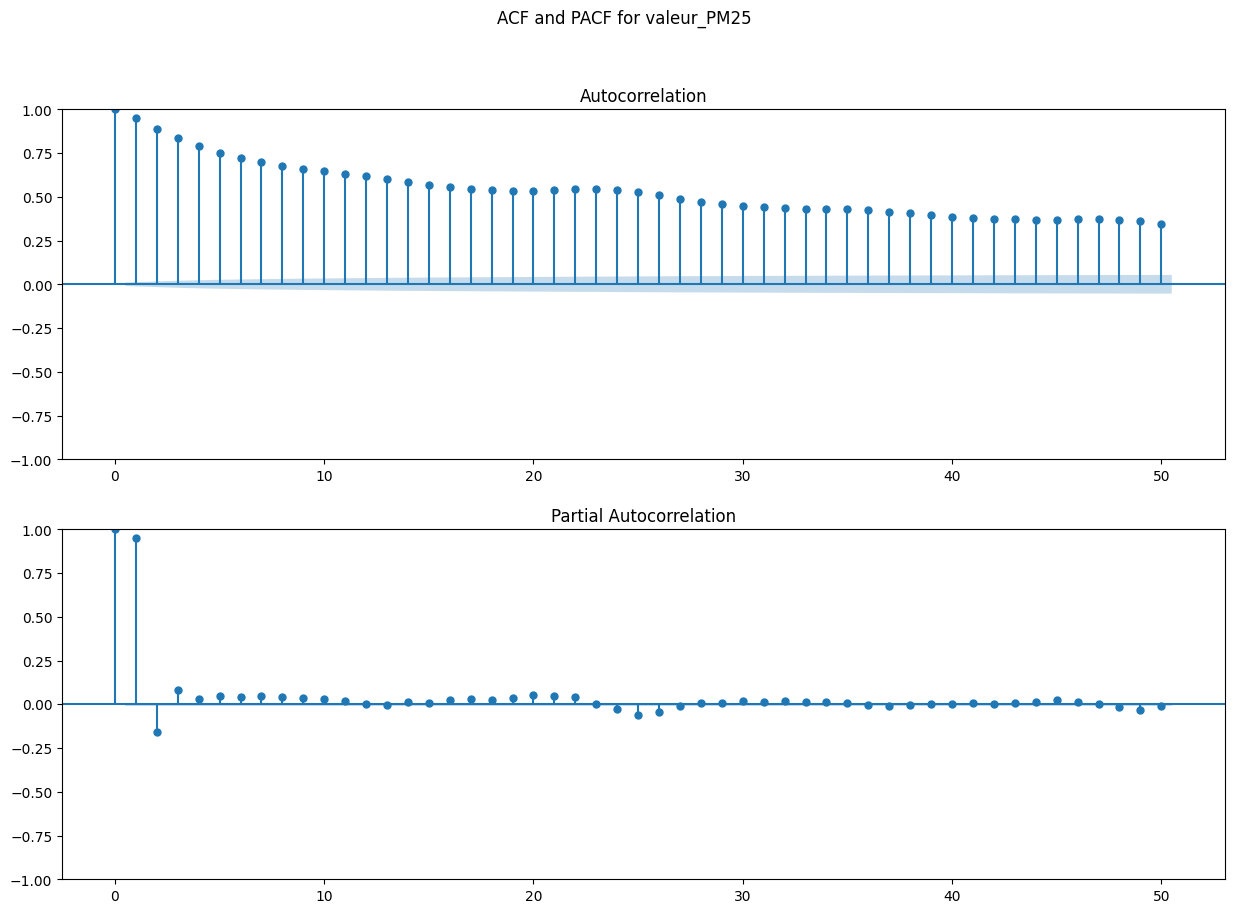

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

for column in variables:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))
    plot_acf(df[column].dropna(), ax=ax1, lags=50)
    plot_pacf(df[column].dropna(), ax=ax2, lags=50)
    plt.suptitle(f'ACF and PACF for {column}')
    plt.show()

We have spike mainly until Lag 2 to 3. so 2 could be a good option for our model p,d,q

##### Stationarity test

In [14]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

for column in variables:
    print(f"\nAugmented Dickey-Fuller Test for {column}")
    adf_test(df[column])


Augmented Dickey-Fuller Test for valeur_NO2
ADF Statistic: -16.258445517730884
p-value: 3.5860732917017154e-29
Critical Values:
	1%: -3.4305097349857605
	5%: -2.8616105992389294
	10%: -2.5668075776998833

Augmented Dickey-Fuller Test for valeur_CO
ADF Statistic: -15.485660755113713
p-value: 2.522793591509768e-28
Critical Values:
	1%: -3.4305097466921217
	5%: -2.861610604412736
	10%: -2.5668075804537582

Augmented Dickey-Fuller Test for valeur_O3
ADF Statistic: -11.856875460592873
p-value: 6.994217713526101e-22
Critical Values:
	1%: -3.4305097388876904
	5%: -2.861610600963447
	10%: -2.566807578617797

Augmented Dickey-Fuller Test for valeur_PM10
ADF Statistic: -16.811400852511312
p-value: 1.1982387570442718e-29
Critical Values:
	1%: -3.4305097388876904
	5%: -2.861610600963447
	10%: -2.566807578617797

Augmented Dickey-Fuller Test for valeur_PM25
ADF Statistic: -16.236601745447036
p-value: 3.76432173967312e-29
Critical Values:
	1%: -3.4305097388876904
	5%: -2.861610600963447
	10%: -2.56

Conclusion of stationarity tests: Series are stationary according to ADF

#### Outliers handling

Processing valeur_NO2


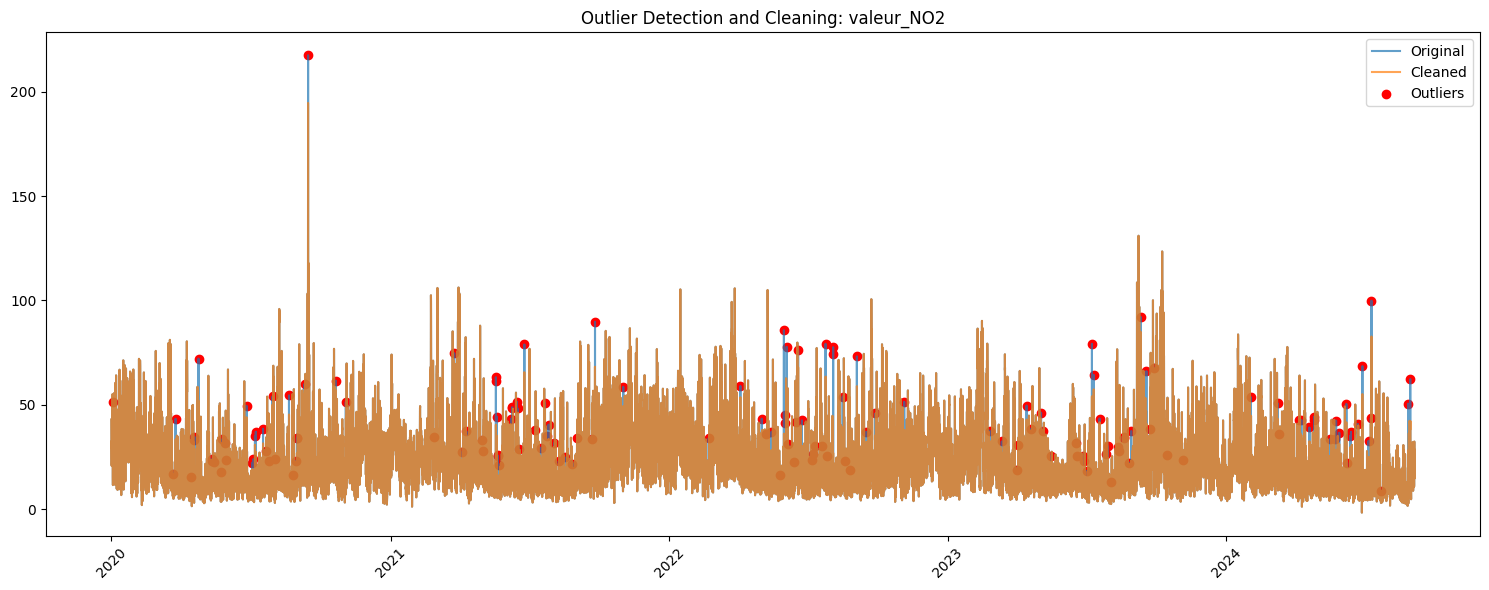

Processing valeur_CO


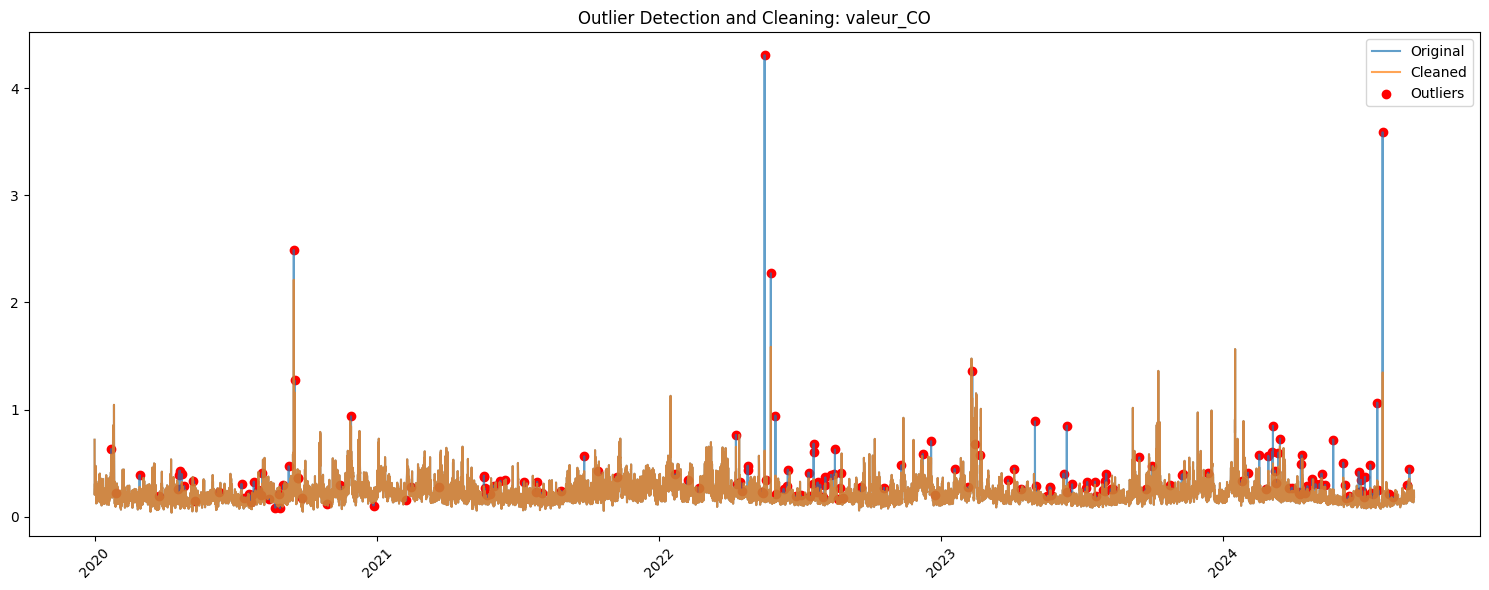

Processing valeur_O3


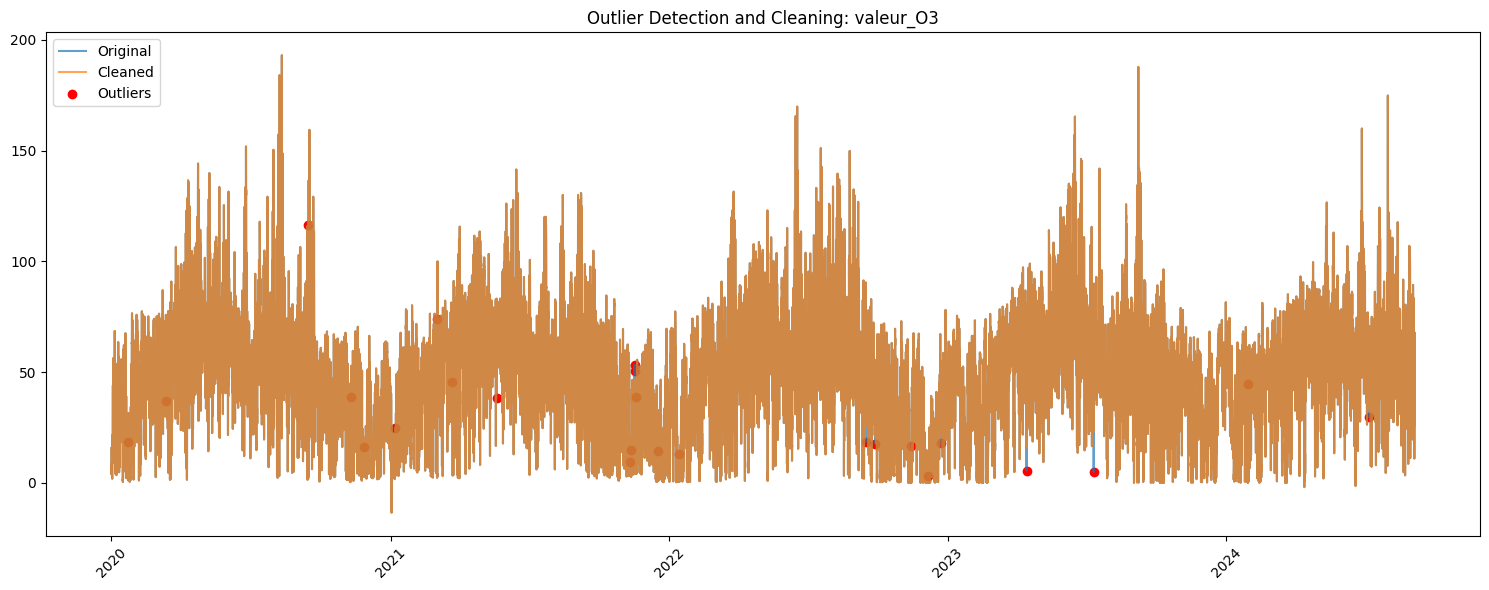

Processing valeur_PM10


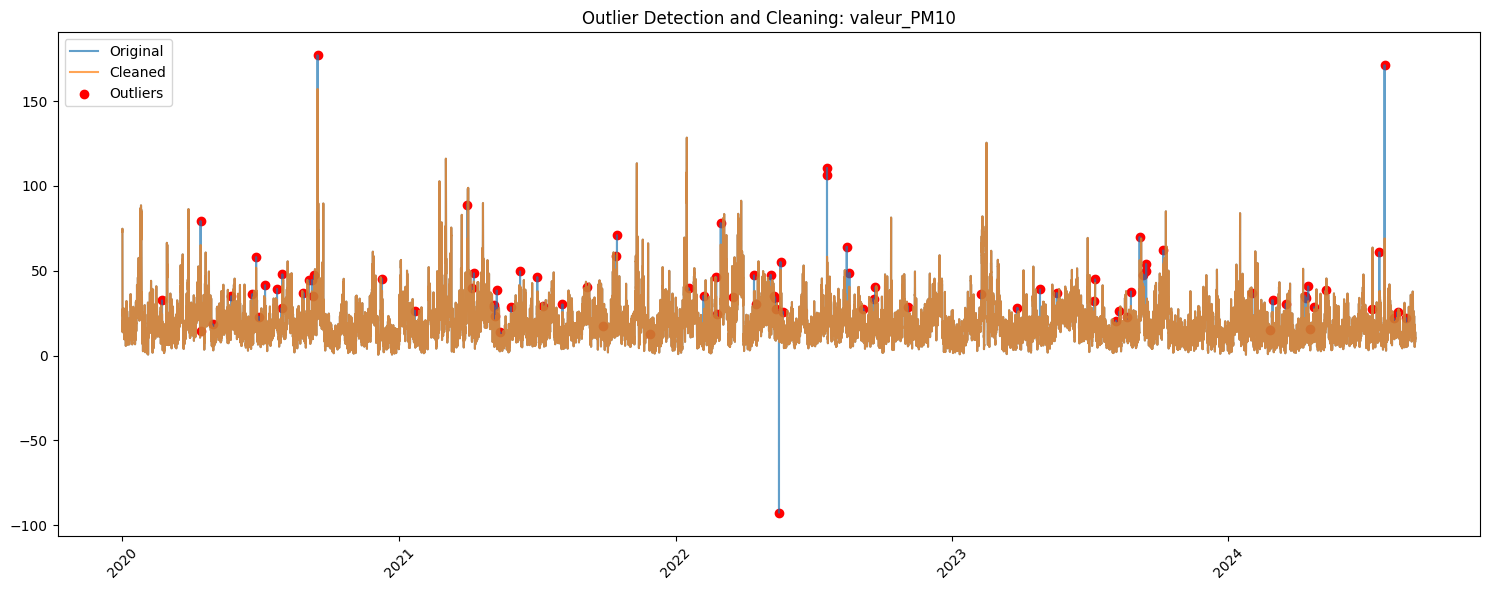

Processing valeur_PM25


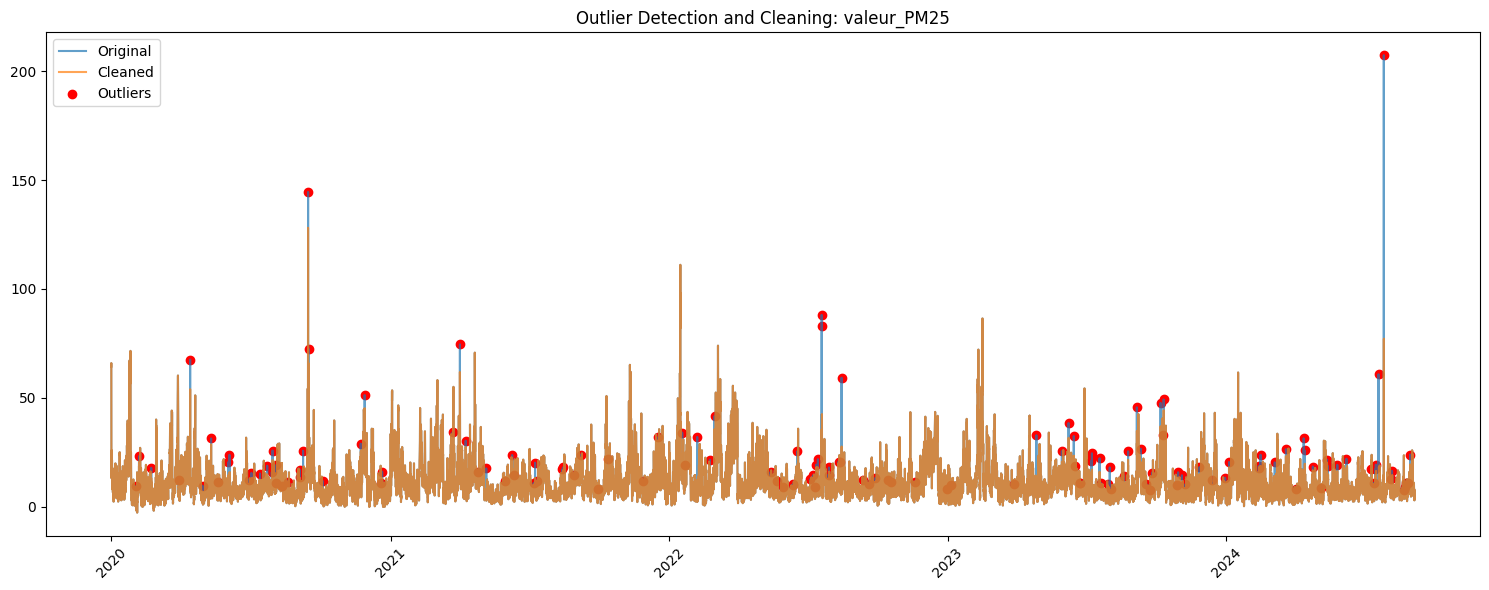

Cleaned data saved to 'final_cleaned_data.csv'


In [16]:

def detect_outliers(series, window=24, threshold=3):
    rolling_median = series.rolling(window=window, center=True).median()
    rolling_std = series.rolling(window=window, center=True).std()
    outliers = np.abs(series - rolling_median) > (threshold * rolling_std)
    return outliers

def interpolate_outliers(series, outliers):
    series_clean = series.copy()
    series_clean[outliers] = np.nan
    return series_clean.interpolate()

def plot_outliers(original, cleaned, outliers, title):
    plt.figure(figsize=(15, 6))
    plt.plot(original.index, original, label='Original', alpha=0.7)
    plt.plot(cleaned.index, cleaned, label='Cleaned', alpha=0.7)
    plt.scatter(original[outliers].index, original[outliers], color='red', label='Outliers')
    plt.title(title)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Process each variable
for column in variables:
    print(f"Processing {column}")
    
    # Detect outliers
    outliers = detect_outliers(df[column].dropna())
    
    # Interpolate outliers
    df[f'{column}_clean'] = interpolate_outliers(df[column], outliers)
    
    # Plot original vs cleaned data
    plot_outliers(df[column], df[f'{column}_clean'], outliers, f'Outlier Detection and Cleaning: {column}')

# Save the cleaned data
df.to_csv('final_cleaned_data.csv')
print("Cleaned data saved to 'final_cleaned_data.csv'")

### RF modeling

In [18]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [29]:
df = pd.read_csv('final_cleaned_data.csv', parse_dates=['id'], index_col='id')
df.head()

,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),precipitation (mm),...,soil_moisture_100_to_255cm (m³/m³),is_holiday,2_wheeler_motor,4_wheeler_motor,bikes_scooters,valeur_NO2_clean,valeur_CO_clean,valeur_O3_clean,valeur_PM10_clean,valeur_PM25_clean
id,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,42.9,0.718000,15.7,73.1,64.4,-0.2,99,-0.3,-2.7,0.0,...,0.288,True,NaN,NaN,NaN,42.9,0.718000,15.7,73.1,64.4
2020-01-01 01:00:00,33.6,0.587000,10.1,74.8,66.0,2.6,98,2.3,0.3,0.0,...,0.288,True,NaN,NaN,NaN,33.6,0.587000,10.1,74.8,66.0
2020-01-01 02:00:00,29.3,0.446091,5.1,51.0,44.9,2.1,100,2.0,-0.3,0.0,...,0.288,True,NaN,NaN,NaN,29.3,0.446091,5.1,51.0,44.9
2020-01-01 03:00:00,30.5,0.246000,7.2,27.7,25.1,1.9,100,1.9,-0.7,0.0,...,0.288,True,NaN,NaN,NaN,30.5,0.246000,7.2,27.7,25.1
2020-01-01 04:00:00,29.3,0.204000,8.3,15.3,13.6,2.2,98,1.9,-0.7,0.0,...,0.288,True,NaN,NaN,NaN,29.3,0.204000,8.3,15.3,13.6


In [32]:
# Reset the index if needed
df = df.reset_index()

# Set 'id' as the index again
df.set_index('id', inplace=True)

In [40]:
df_cleared = df.drop(columns=['valeur_NO2', 'valeur_CO', 'valeur_O3', 'valeur_PM10', 'valeur_PM25', 'bikes_scooters', '4_wheeler_motor', '2_wheeler_motor' ])

In [44]:
# Reset the index if needed
df_cleared = df.reset_index()

# Set 'id' as the index again
df_cleared.set_index('id', inplace=True)

In [47]:

df_cleared.columns

Index(['temperature_2m (°C)', 'relative_humidity_2m (%)', 'dew_point_2m (°C)',
       'apparent_temperature (°C)', 'precipitation (mm)', 'rain (mm)',
       'snowfall (cm)', 'snow_depth (m)', 'surface_pressure (hPa)',
       'cloud_cover (%)', 'wind_speed_10m (km/h)', 'wind_speed_100m (km/h)',
       'wind_direction_10m (°)', 'wind_direction_100m (°)',
       'wind_gusts_10m (km/h)', 'soil_temperature_0_to_7cm (°C)',
       'soil_temperature_7_to_28cm (°C)', 'soil_temperature_28_to_100cm (°C)',
       'soil_temperature_100_to_255cm (°C)', 'soil_moisture_0_to_7cm (m³/m³)',
       'soil_moisture_7_to_28cm (m³/m³)', 'soil_moisture_28_to_100cm (m³/m³)',
       'soil_moisture_100_to_255cm (m³/m³)', 'is_holiday', 'valeur_NO2_clean',
       'valeur_CO_clean', 'valeur_O3_clean', 'valeur_PM10_clean',
       'valeur_PM25_clean', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear', 'dayofmonth', 'weekofyear'],
      dtype='object')

In [130]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt


Processing valeur_NO2_clean
MAE for valeur_NO2_clean: 4.144432157160844


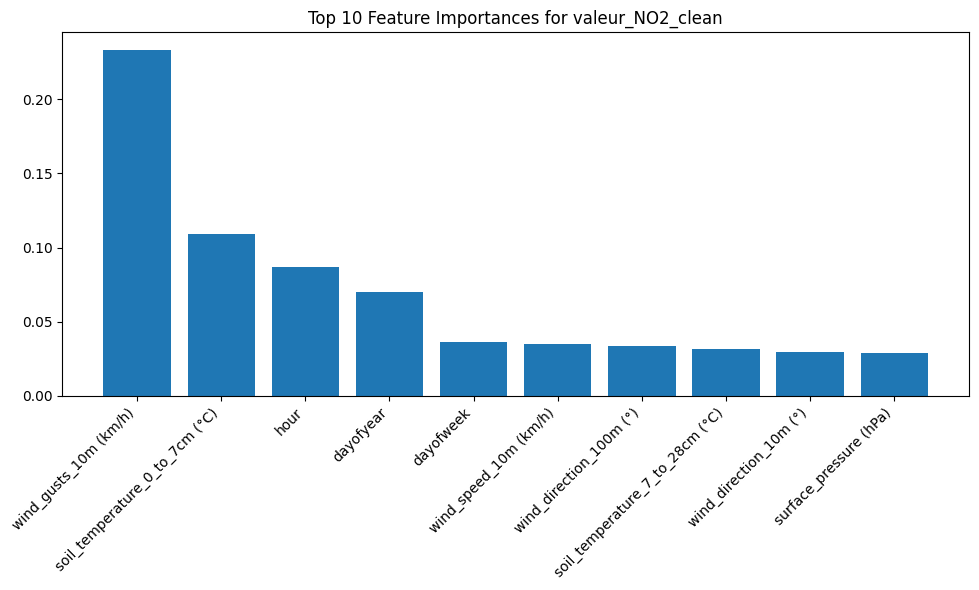

Processing valeur_CO_clean
MAE for valeur_CO_clean: 0.022734197899521916


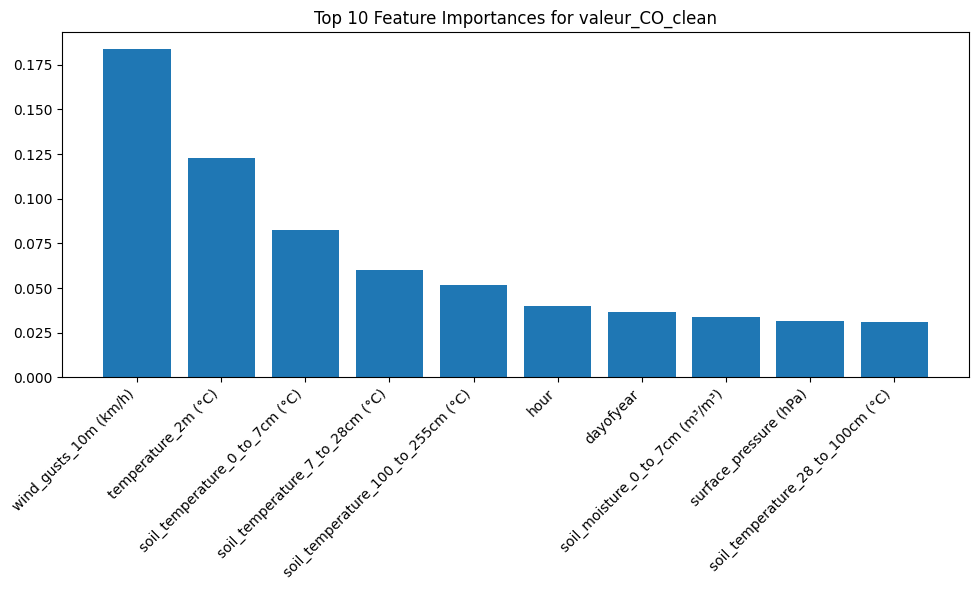

Processing valeur_O3_clean
MAE for valeur_O3_clean: 6.714334647046665


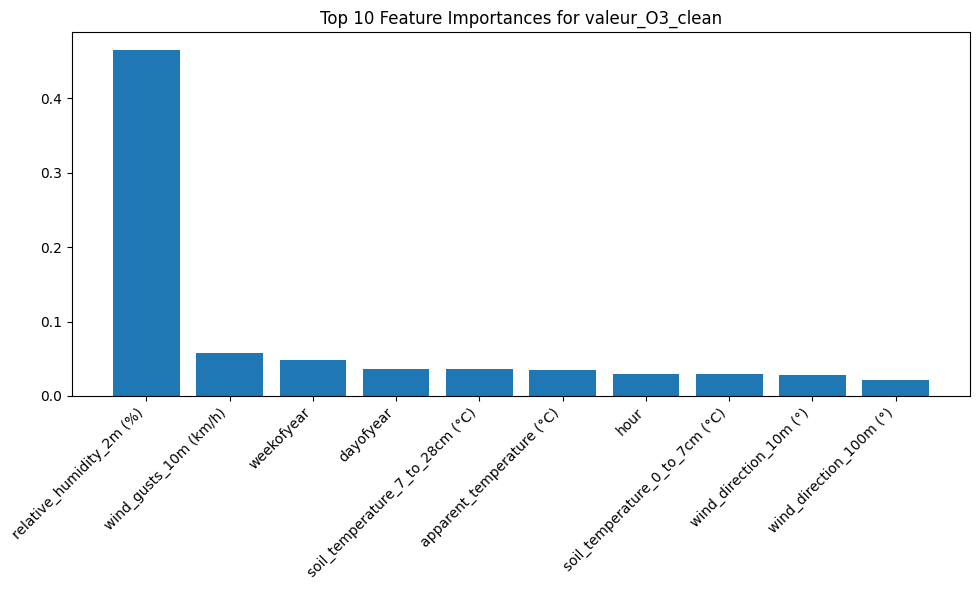

Processing valeur_PM10_clean
MAE for valeur_PM10_clean: 3.00917017139042


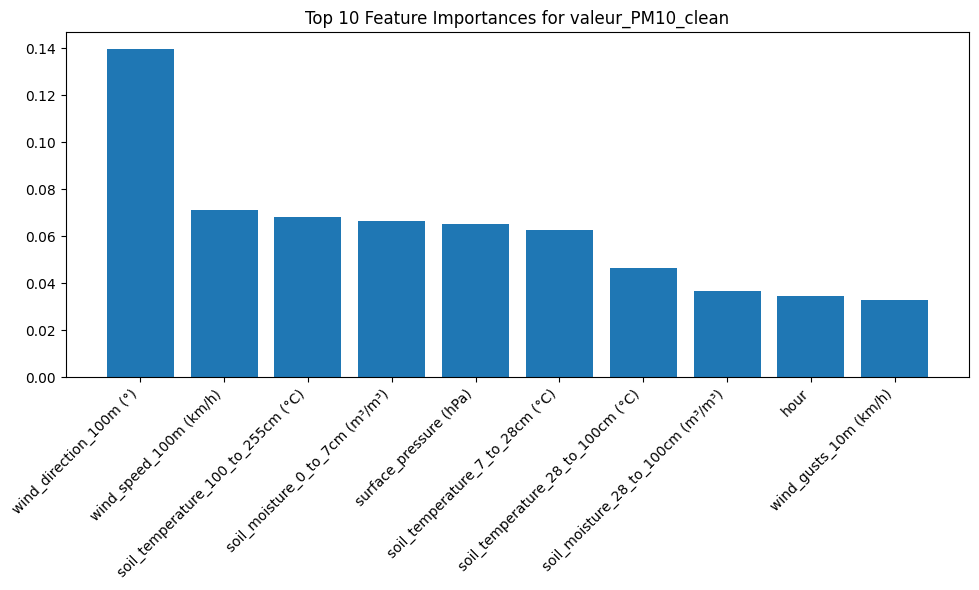

Processing valeur_PM25_clean
MAE for valeur_PM25_clean: 1.8303462769912318


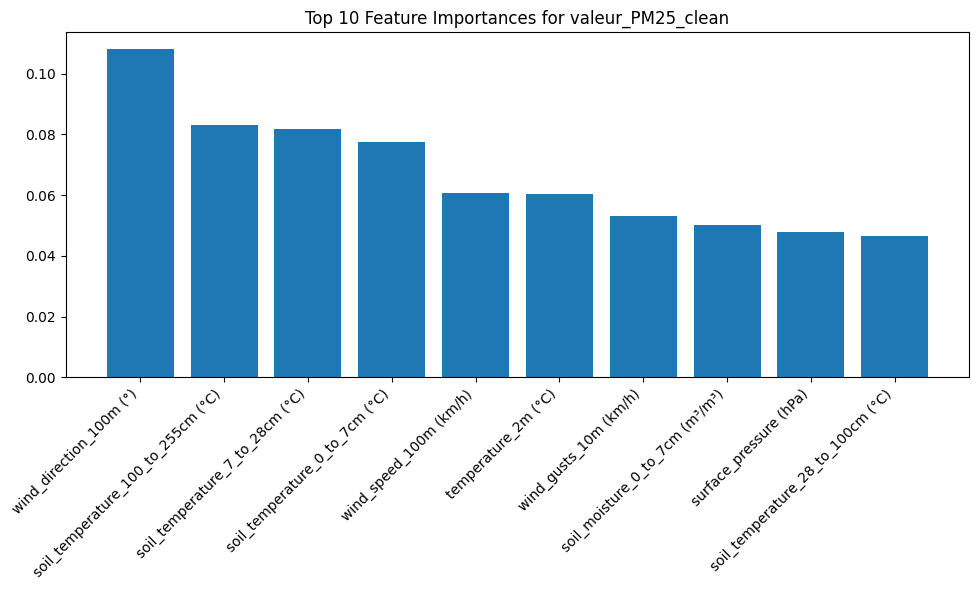


Global MAE for Random Forest: 3.1442034900977367
Predictions saved to 'rf_predictions_clean.csv'


In [135]:

# Define the target variables (those ending with '_clean')
target_variables = [col for col in df_cleared.columns if col.endswith('_clean')]

# Define feature columns (all columns except target variables)
feature_columns = [col for col in df_cleared.columns if col not in target_variables]

# Dictionary to store models, MAEs, and feature importances
models = {}
maes = {}
feature_importances = {}

# Apply Random Forest to each target variable
for var in target_variables:
    print(f"Processing {var}")
    
    # Prepare the data
    X = df_cleared[feature_columns]
    y = df_cleared[var].dropna()
    
    # Align X with y (remove rows where y is NaN)
    X = X.loc[y.index]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Store the model
    models[var] = model
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, predictions)
    maes[var] = mae
    print(f"MAE for {var}: {mae}")
    
    # Store feature importance
    importance = pd.DataFrame({'feature': feature_columns, 'importance': model.feature_importances_})
    importance = importance.sort_values('importance', ascending=False)
    feature_importances[var] = importance
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(importance['feature'][:10], importance['importance'][:10])
    plt.title(f'Top 10 Feature Importances for {var}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Calculate global MAE
global_mae = np.mean(list(maes.values()))
print(f"\nGlobal MAE for Random Forest: {global_mae}")

# Load the test data
test_df = pd.read_csv('data/final_test.csv', parse_dates=['id'], index_col='id')

# Add time-based features to test data
test_df['hour'] = test_df.index.hour
test_df['dayofweek'] = test_df.index.dayofweek
test_df['quarter'] = test_df.index.quarter
test_df['month'] = test_df.index.month
test_df['year'] = test_df.index.year
test_df['dayofyear'] = test_df.index.dayofyear
test_df['dayofmonth'] = test_df.index.day
test_df['weekofyear'] = test_df.index.isocalendar().week

# Make predictions for each variable
predictions = {}
for var in target_variables:
    model = models[var]
    predictions[var] = model.predict(test_df[feature_columns])

# Create a DataFrame with predictions
predictions_df = pd.DataFrame(predictions, index=test_df.index)

# Rename columns to remove '_clean' suffix
predictions_df.columns = [col.replace('_clean', '') for col in predictions_df.columns]

# Save predictions to CSV
predictions_df.to_csv('rf_predictions_clean.csv')
print("Predictions saved to 'rf_predictions_clean.csv'")

In [137]:
# Extract only the hour from the 'id' column
df = pd.read_csv('rf_predictions_clean.csv')
df.head()

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
0,2024-09-03 23:00:00,22.377449,0.198707,45.814884,13.609700,6.305401
1,2024-09-04 00:00:00,21.582980,0.167640,51.024000,11.066687,6.456875
2,2024-09-04 01:00:00,19.653229,0.168981,48.347000,11.160470,6.535403
3,2024-09-04 02:00:00,14.300360,0.168084,49.589000,9.793346,5.863900
4,2024-09-04 03:00:00,15.060121,0.179452,45.410517,12.014638,6.393925


In [138]:
# Extract only the hour from the 'id' column
df = pd.read_csv('rf_predictions_clean.csv')
df.head()
# Convert the 'id' column to datetime format
df['id'] = pd.to_datetime(df['id'])

# Reformat the 'id' column to keep only date and hour (drop minutes and seconds)
df['id'] = df['id'].dt.strftime('%Y-%m-%d %H')

In [139]:
df.head()

,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
0,2024-09-03 23,22.377449,0.198707,45.814884,13.609700,6.305401
1,2024-09-04 00,21.582980,0.167640,51.024000,11.066687,6.456875
2,2024-09-04 01,19.653229,0.168981,48.347000,11.160470,6.535403
3,2024-09-04 02,14.300360,0.168084,49.589000,9.793346,5.863900
4,2024-09-04 03,15.060121,0.179452,45.410517,12.014638,6.393925


In [140]:

# Save predictions to CSV
df.to_csv('rf_predictions_clean.csv')
print("Predictions saved to 'rf_predictions_clean.csv'")

Predictions saved to 'rf_predictions_clean.csv'


### RF model with feature selection

In [143]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 4.8 MB/s eta 0:00:27
    --------------------------------------- 1.6/124.9 MB 3.8 MB/s eta 0:00:33
    --------------------------------------- 2.9/124.9 MB 4.8 MB/s eta 0:00:26
   - -------------------------------------- 4.2/124.9 MB 5.0 MB/s eta 0:00:25
   - -------------------------------------- 5.2/124.9 MB 5.1 MB/s eta 0:00:24
   -- ------------------------------------- 6.6/124.9 MB 5.2 MB/s eta 0:00:23
   -- ------------------------------------- 7.9/124.9 MB 5.3 MB/s eta 0:00:23
   -- ------------------------------------- 9.2/124.9 MB 5.4 MB/s eta 0:00:22
   --- ------------------------------------ 10.2/124.9 MB 5.4 MB/s eta 0:00:22
   --- ------------------------------------ 11.5/124.9 MB 5.4 MB/s eta 0:00:21
   ---- ----------------------------------- 12.6/124.9 MB 5.4 MB/s eta 0:00:21
   ---- ----------------------------------- 14.2/124.9 MB 5.5 MB/s e


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [144]:
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor


Processing valeur_NO2_clean
MAE for valeur_NO2_clean: 4.917479917741706


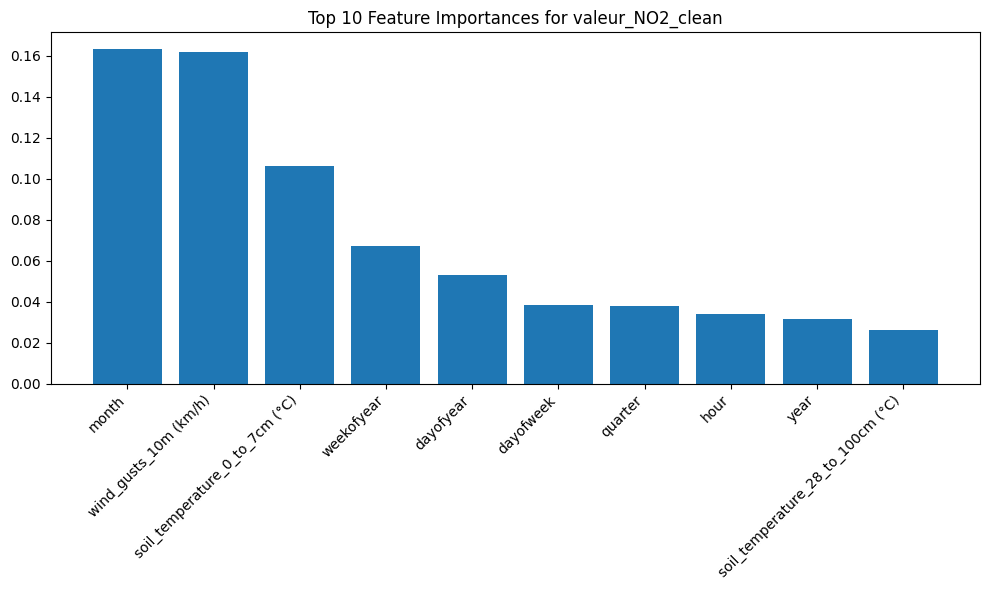

Processing valeur_CO_clean
MAE for valeur_CO_clean: 0.02929523649019249


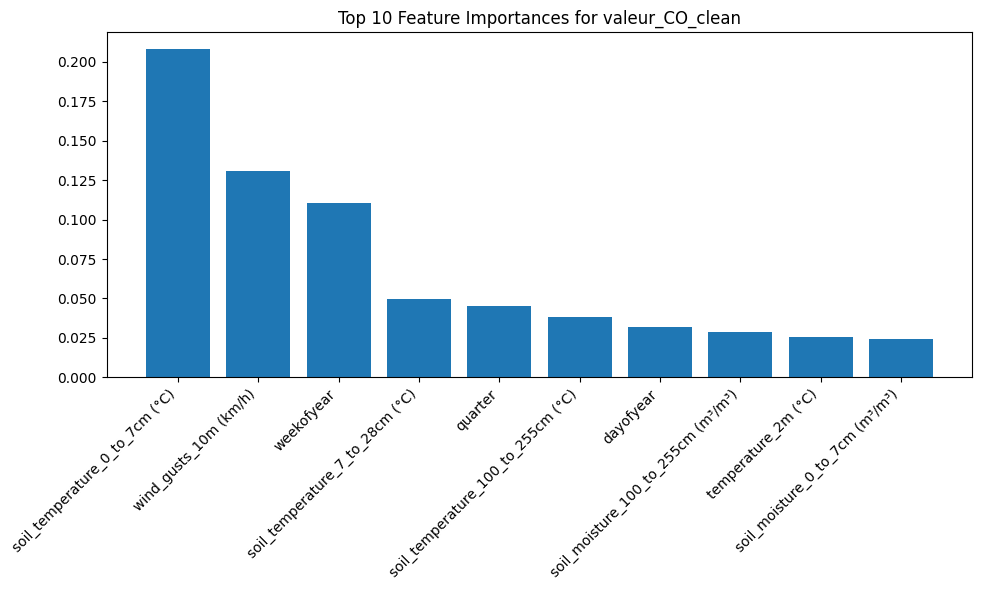

Processing valeur_O3_clean
MAE for valeur_O3_clean: 7.990337382178515


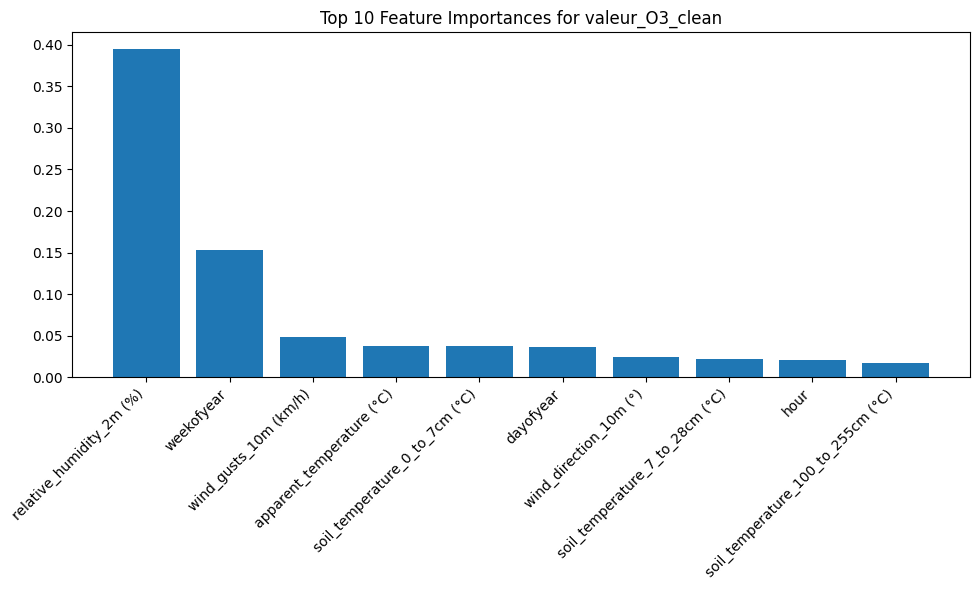

Processing valeur_PM10_clean
MAE for valeur_PM10_clean: 4.02960517758591


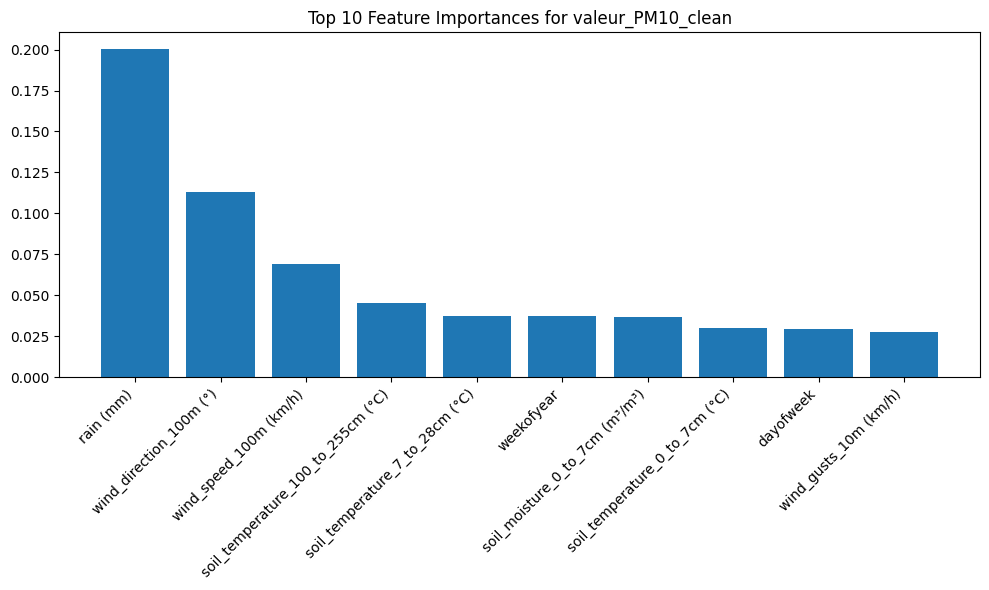

Processing valeur_PM25_clean
MAE for valeur_PM25_clean: 2.6900778559840717


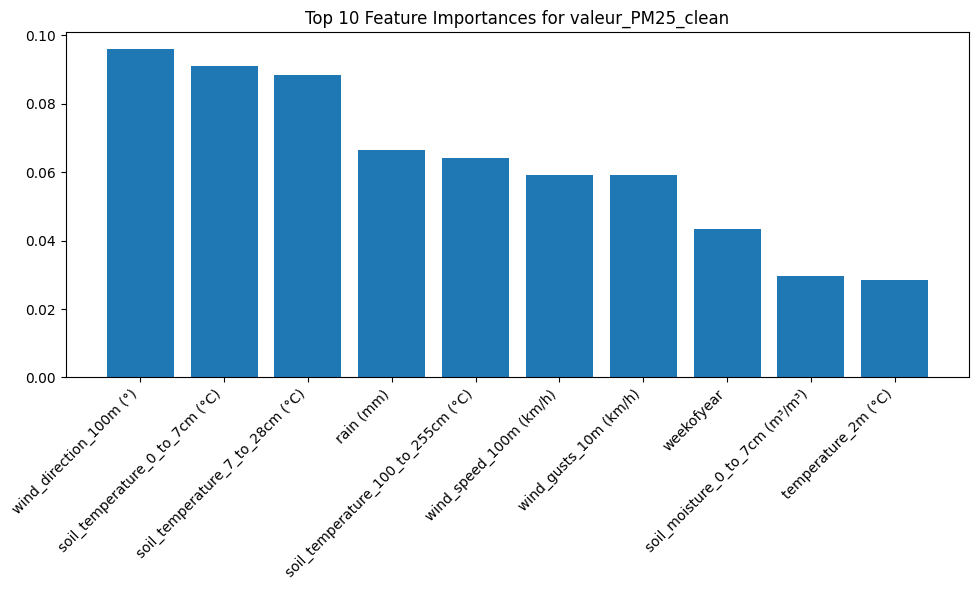


Global MAE for Random Forest: 3.9313591139960793
Predictions saved to 'xgb_predictions_clean.csv'


In [146]:

# Define the target variables (those ending with '_clean')
target_variables = [col for col in df_cleared.columns if col.endswith('_clean')]

# Define feature columns (all columns except target variables)
feature_columns = [col for col in df_cleared.columns if col not in target_variables]

# Dictionary to store models, MAEs, and feature importances
models = {}
maes = {}
feature_importances = {}

# Apply Random Forest to each target variable
for var in target_variables:
    print(f"Processing {var}")
    
    # Prepare the data
    X = df_cleared[feature_columns]
    y = df_cleared[var].dropna()
    
    # Align X with y (remove rows where y is NaN)
    X = X.loc[y.index]
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Fit the model
    # Fit the model
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)
    
    # Store the model
    models[var] = model
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate MAE
    mae = mean_absolute_error(y_test, predictions)
    maes[var] = mae
    print(f"MAE for {var}: {mae}")
    
    # Store feature importance
    importance = pd.DataFrame({'feature': feature_columns, 'importance': model.feature_importances_})
    importance = importance.sort_values('importance', ascending=False)
    feature_importances[var] = importance
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.bar(importance['feature'][:10], importance['importance'][:10])
    plt.title(f'Top 10 Feature Importances for {var}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Calculate global MAE
global_mae = np.mean(list(maes.values()))
print(f"\nGlobal MAE for Random Forest: {global_mae}")

# Load the test data
test_df = pd.read_csv('data/final_test.csv', parse_dates=['id'], index_col='id')

# Add time-based features to test data
test_df['hour'] = test_df.index.hour
test_df['dayofweek'] = test_df.index.dayofweek
test_df['quarter'] = test_df.index.quarter
test_df['month'] = test_df.index.month
test_df['year'] = test_df.index.year
test_df['dayofyear'] = test_df.index.dayofyear
test_df['dayofmonth'] = test_df.index.day
test_df['weekofyear'] = test_df.index.isocalendar().week

# Make predictions for each variable
predictions = {}
for var in target_variables:
    model = models[var]
    predictions[var] = model.predict(test_df[feature_columns])

# Create a DataFrame with predictions
predictions_df = pd.DataFrame(predictions, index=test_df.index)

# Rename columns to remove '_clean' suffix
predictions_df.columns = [col.replace('_clean', '') for col in predictions_df.columns]

# Save predictions to CSV
predictions_df.to_csv('xgb_predictions_clean.csv')
print("Predictions saved to 'xgb_predictions_clean.csv'")

In [147]:
# Extract only the hour from the 'id' column
df = pd.read_csv('xgb_predictions_clean.csv')
df.head()
# Convert the 'id' column to datetime format
df['id'] = pd.to_datetime(df['id'])

# Reformat the 'id' column to keep only date and hour (drop minutes and seconds)
df['id'] = df['id'].dt.strftime('%Y-%m-%d %H')
df.set_index('id', inplace=True)
# Save predictions to CSV
df.to_csv('xgb_predictions_clean.csv')
print("Predictions saved to 'xgb_predictions_clean.csv'")

Predictions saved to 'xgb_predictions_clean.csv'


#### optimize parameters of xgboost

In [148]:
from sklearn.model_selection import RandomizedSearchCV

Traitement de valeur_NO2_clean
MAE pour valeur_NO2_clean: 3.5524703122202412


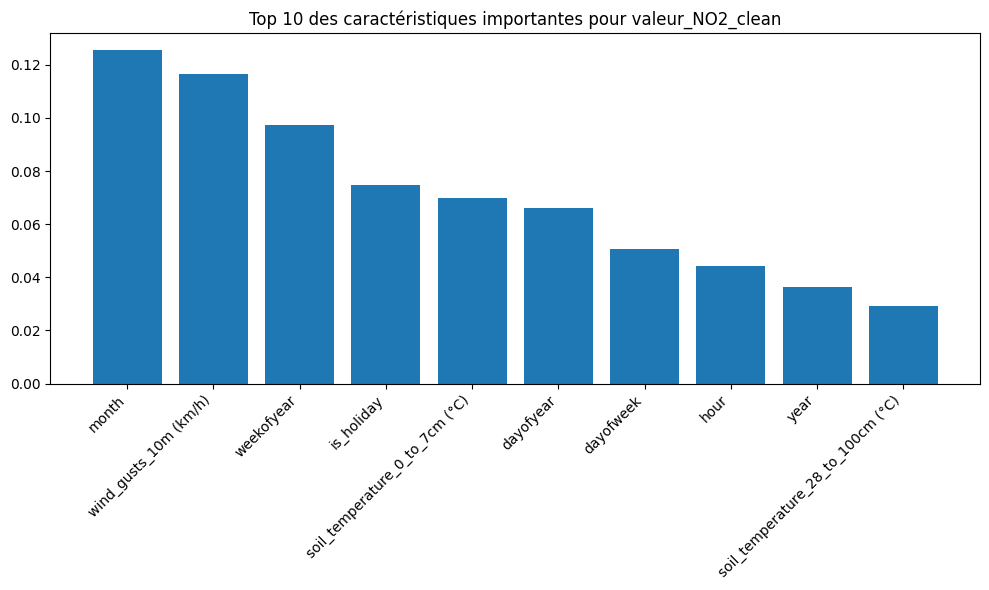

Traitement de valeur_CO_clean
MAE pour valeur_CO_clean: 0.022513987851775087


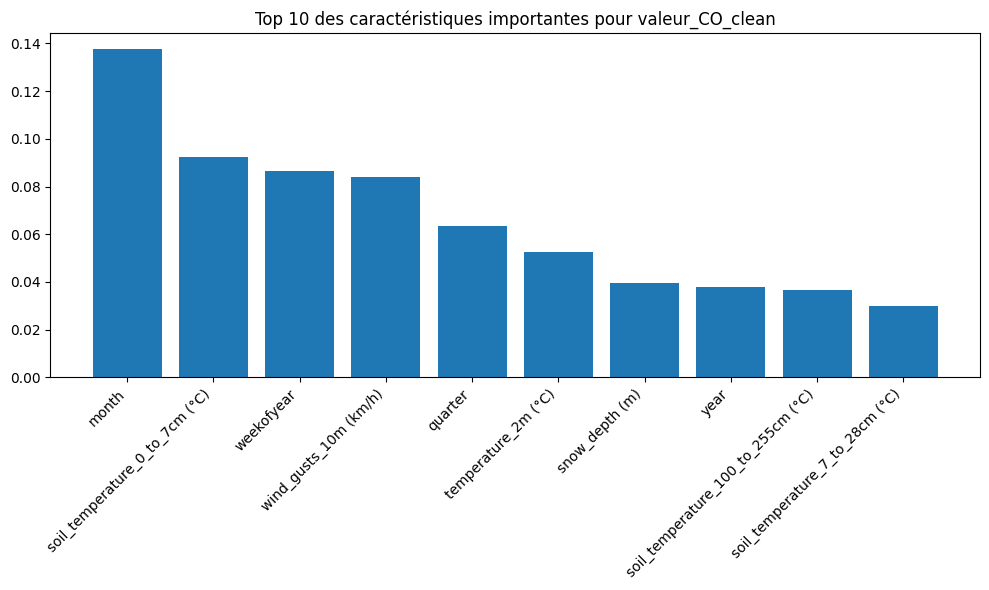

Traitement de valeur_O3_clean
MAE pour valeur_O3_clean: 5.328931870717036


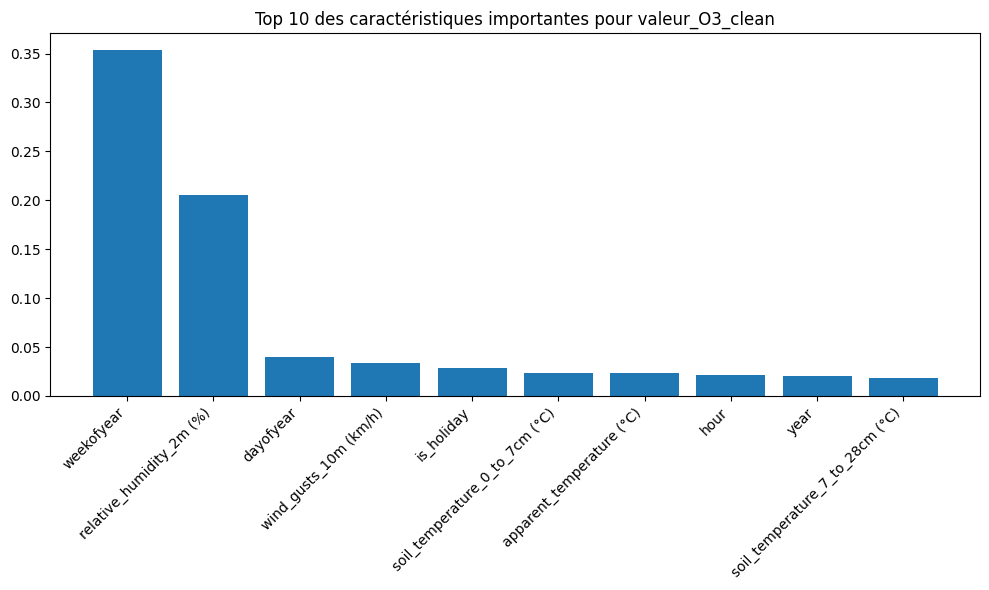

Traitement de valeur_PM10_clean
MAE pour valeur_PM10_clean: 2.661550155760503


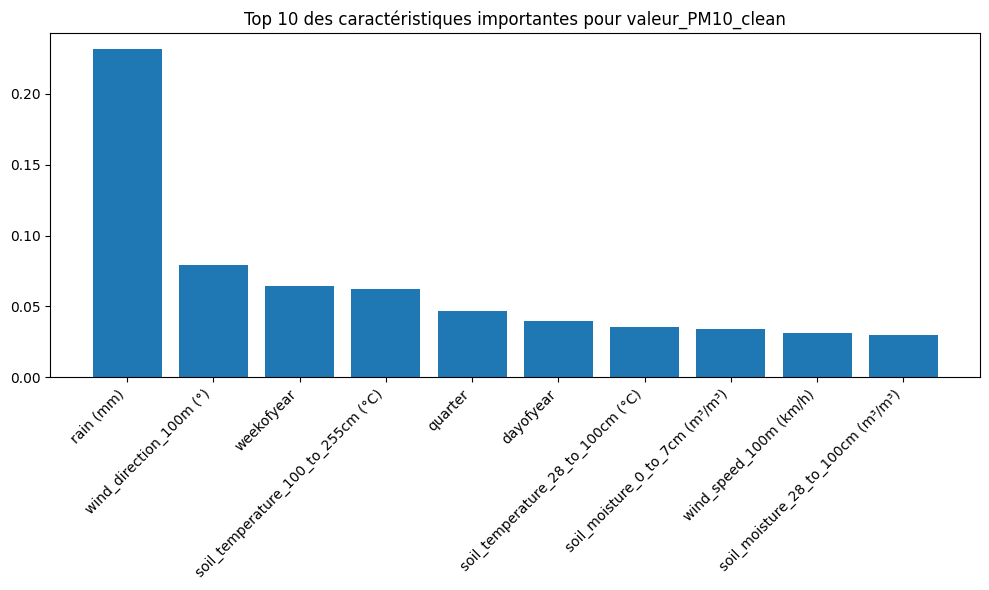

Traitement de valeur_PM25_clean
MAE pour valeur_PM25_clean: 1.6729720584331709


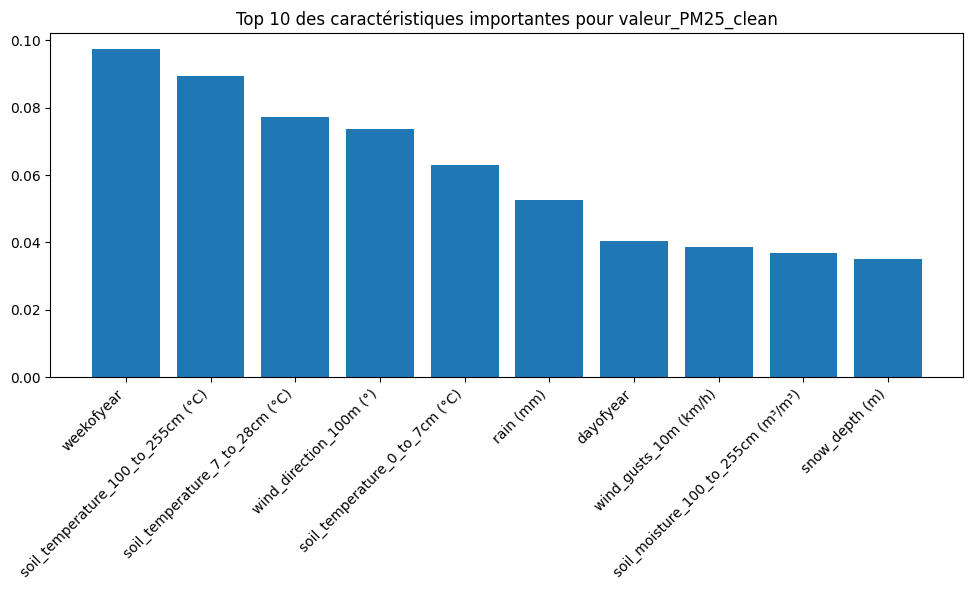


MAE global pour XGBoost: 2.6476876769965454


KeyError: "['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 'dayofmonth', 'weekofyear'] not in index"

In [149]:
# Définir l'espace de recherche des hyperparamètres
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'min_child_weight': [1, 2, 3, 4, 5]
}

# Appliquer XGBoost à chaque variable cible
for var in target_variables:
    print(f"Traitement de {var}")
    
    # Préparer les données
    X = df_cleared[feature_columns]
    y = df_cleared[var].dropna()
    X = X.loc[y.index]
    
    # Diviser les données en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialiser le modèle de base
    base_model = XGBRegressor(random_state=42)
    
    # Effectuer une recherche aléatoire des hyperparamètres
    random_search = RandomizedSearchCV(base_model, param_distributions=param_dist, 
                                       n_iter=50, cv=3, random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)
    
    # Obtenir le meilleur modèle
    best_model = random_search.best_estimator_
    
    # Stocker le modèle
    models[var] = best_model
    
    # Faire des prédictions
    predictions = best_model.predict(X_test)
    
    # Calculer MAE
    mae = mean_absolute_error(y_test, predictions)
    maes[var] = mae
    print(f"MAE pour {var}: {mae}")
    
    # Stocker l'importance des caractéristiques
    importance = pd.DataFrame({'feature': feature_columns, 'importance': best_model.feature_importances_})
    importance = importance.sort_values('importance', ascending=False)
    feature_importances[var] = importance
    
    # Tracer l'importance des caractéristiques
    plt.figure(figsize=(10, 6))
    plt.bar(importance['feature'][:10], importance['importance'][:10])
    plt.title(f'Top 10 des caractéristiques importantes pour {var}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Calculer le MAE global
global_mae = np.mean(list(maes.values()))
print(f"\nMAE global pour XGBoost: {global_mae}")



In [150]:

# Charger les données de test
test_df = pd.read_csv('data/final_test.csv', parse_dates=['id'], index_col='id')


# Add time-based features to test data
test_df['hour'] = test_df.index.hour
test_df['dayofweek'] = test_df.index.dayofweek
test_df['quarter'] = test_df.index.quarter
test_df['month'] = test_df.index.month
test_df['year'] = test_df.index.year
test_df['dayofyear'] = test_df.index.dayofyear
test_df['dayofmonth'] = test_df.index.day
test_df['weekofyear'] = test_df.index.isocalendar().week
# Faire des prédictions pour chaque variable
predictions = {}
for var in target_variables:
    model = models[var]
    predictions[var] = model.predict(test_df[feature_columns])

# Créer un DataFrame avec les prédictions
predictions_df = pd.DataFrame(predictions, index=test_df.index)

# Renommer les colonnes pour supprimer le suffixe '_clean'
predictions_df.columns = [col.replace('_clean', '') for col in predictions_df.columns]

# Sauvegarder les prédictions dans un fichier CSV
predictions_df.to_csv('xgb_predictions_optimized.csv')
print("Prédictions sauvegardées dans 'xgb_predictions_optimized.csv'")

Prédictions sauvegardées dans 'xgb_predictions_optimized.csv'


In [151]:
# Extract only the hour from the 'id' column
df = pd.read_csv('xgb_predictions_optimized.csv')
df.head()
# Convert the 'id' column to datetime format
df['id'] = pd.to_datetime(df['id'])

# Reformat the 'id' column to keep only date and hour (drop minutes and seconds)
df['id'] = df['id'].dt.strftime('%Y-%m-%d %H')
# Save predictions to CSV
df.to_csv('xgb_predictions_optimized.csv')
print("Predictions saved to 'xgb_predictions_optimized.csv'")

Predictions saved to 'xgb_predictions_optimized.csv'


In [152]:
df = pd.read_csv('xgb_predictions_optimized.csv')
df.head()

,Unnamed: 0,id,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
0,0,2024-09-03 23,19.245205,0.179124,47.921220,9.625973,4.736471
1,1,2024-09-04 00,16.849268,0.164452,52.270020,11.194317,5.177230
2,2,2024-09-04 01,14.349435,0.153882,48.249256,10.520701,4.990534
3,3,2024-09-04 02,11.800894,0.147566,48.992725,8.400697,3.446359
4,4,2024-09-04 03,12.580003,0.151210,43.549088,9.796807,4.454941


In [153]:
df = df.drop(columns='Unnamed: 0')

In [154]:
df['id'] = pd.to_datetime(df['id'])

# Reformat the 'id' column to keep only date and hour (drop minutes and seconds)
df['id'] = df['id'].dt.strftime('%Y-%m-%d %H')
df.set_index('id', inplace=True)

In [155]:
df.head()

,valeur_NO2,valeur_CO,valeur_O3,valeur_PM10,valeur_PM25
id,,,,,
2024-09-03 23,19.245205,0.179124,47.921220,9.625973,4.736471
2024-09-04 00,16.849268,0.164452,52.270020,11.194317,5.177230
2024-09-04 01,14.349435,0.153882,48.249256,10.520701,4.990534
2024-09-04 02,11.800894,0.147566,48.992725,8.400697,3.446359
2024-09-04 03,12.580003,0.151210,43.549088,9.796807,4.454941


In [156]:
# Save predictions to CSV
df.to_csv('xgb_predictions_optimized.csv')
print("Predictions saved to 'xgb_predictions_optimized.csv'")

Predictions saved to 'xgb_predictions_optimized.csv'
